In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df=pd.read_csv('archive/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 8.4 MB


# **Pre-processing the data**


In [6]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()

# Check city distribution
print("\nCity distribution:")
print(df['City'].value_counts())

Duplicate rows: 0

City distribution:
City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64


In [7]:
# Analyze missing values pattern
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:")
print(missing_percentage.sort_values(ascending=False))

# Since Xylene has >60% missing data, consider dropping it
df = df.drop(['Xylene'], axis=1)

# For other pollutants, use city-wise median imputation
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

for col in pollutants:
    df[col] = df.groupby('City')[col].transform(lambda x: x.fillna(x.median()))

# For AQI and AQI_Bucket, we'll handle them separately
# Remove rows where both AQI and AQI_Bucket are missing
df = df.dropna(subset=['AQI', 'AQI_Bucket'], how='all')

Missing values percentage:
Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64


/home/karan/miniconda3/envs/surveillance/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/karan/miniconda3/envs/surveillance/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/karan/miniconda3/envs/surveillance/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/karan/miniconda3/envs/surveillance/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/karan/miniconda3/envs/surveillance/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/karan/miniconda3/envs/su

In [8]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check for outliers in each pollutant
for col in pollutants:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")

    # Cap outliers to 99th percentile
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

Outliers in PM2.5: 2004
Outliers in PM10: 1225
Outliers in NO: 2351
Outliers in NO2: 1107
Outliers in NOx: 1813
Outliers in NH3: 1098
Outliers in CO: 2303
Outliers in SO2: 2442
Outliers in O3: 725
Outliers in Benzene: 1558
Outliers in Toluene: 2542


In [9]:
#Feature Engineering
# Extract temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Season'] = df['Month'].apply(lambda x: (x % 12 + 3) // 3)  # 1:Winter, 2:Spring, etc.

# Create pollutant ratios (important for air quality analysis)
df['PM_Ratio'] = df['PM2.5'] / df['PM10']
df['NOx_Ratio'] = df['NO2'] / df['NO']
df['SO2_NO2_Ratio'] = df['SO2'] / df['NO2']

# Handle infinite values from division
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.median(numeric_only=True))

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode AQI_Bucket (target variable)
aqi_bucket_mapping = {
    'Good': 0,
    'Satisfactory': 1,
    'Moderate': 2,
    'Poor': 3,
    'Very Poor': 4,
    'Severe': 5
}

df['AQI_Bucket_Encoded'] = df['AQI_Bucket'].map(aqi_bucket_mapping)

# One-hot encode cities
city_encoder = OneHotEncoder(sparse_output=False, drop='first')
city_encoded = city_encoder.fit_transform(df[['City']])
city_columns = [f'City_{city}' for city in city_encoder.categories_[0][1:]]
city_df = pd.DataFrame(city_encoded, columns=city_columns, index=df.index)

df = pd.concat([df, city_df], axis=1)

In [11]:
# Select features for modeling
features = pollutants + ['PM_Ratio', 'NOx_Ratio', 'SO2_NO2_Ratio',
                        'Year', 'Month', 'Day', 'DayOfWeek', 'Season'] + city_columns

X = df[features]
y = df['AQI_Bucket_Encoded']  # For classification
# y_reg = df['AQI']  # For regression

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Final check
print(f"Final dataset shape: {X_train_scaled.shape}")
print(f"Missing values: {np.isnan(X_train_scaled).sum()}")
print("Class distribution:")
print(pd.Series(y_train).value_counts())

# Save processed data
processed_data = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train.values,
    'y_test': y_test.values,
    'feature_names': features,
    'scaler': scaler,
    'city_encoder': city_encoder
}

# Optional: Save to file
import joblib
joblib.dump(processed_data, 'air_quality_processed.pkl')

Final dataset shape: (19880, 44)
Missing values: 0
Class distribution:
AQI_Bucket_Encoded
2    7063
1    6579
3    2225
4    1870
0    1073
5    1070
Name: count, dtype: int64


['air_quality_processed.pkl']

# **EDA**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [14]:
# Basic info
print("\n1. DATASET OVERVIEW")
print(f"Total records: {len(df):,}")
print(f"Time period: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of cities: {df['City'].nunique()}")
print(f"Cities: {df['City'].unique().tolist()}")


1. DATASET OVERVIEW
Total records: 24,850
Time period: 2015-01-01 00:00:00 to 2020-07-01 00:00:00
Number of cities: 26
Cities: ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']



3. TEMPORAL TRENDS ANALYSIS


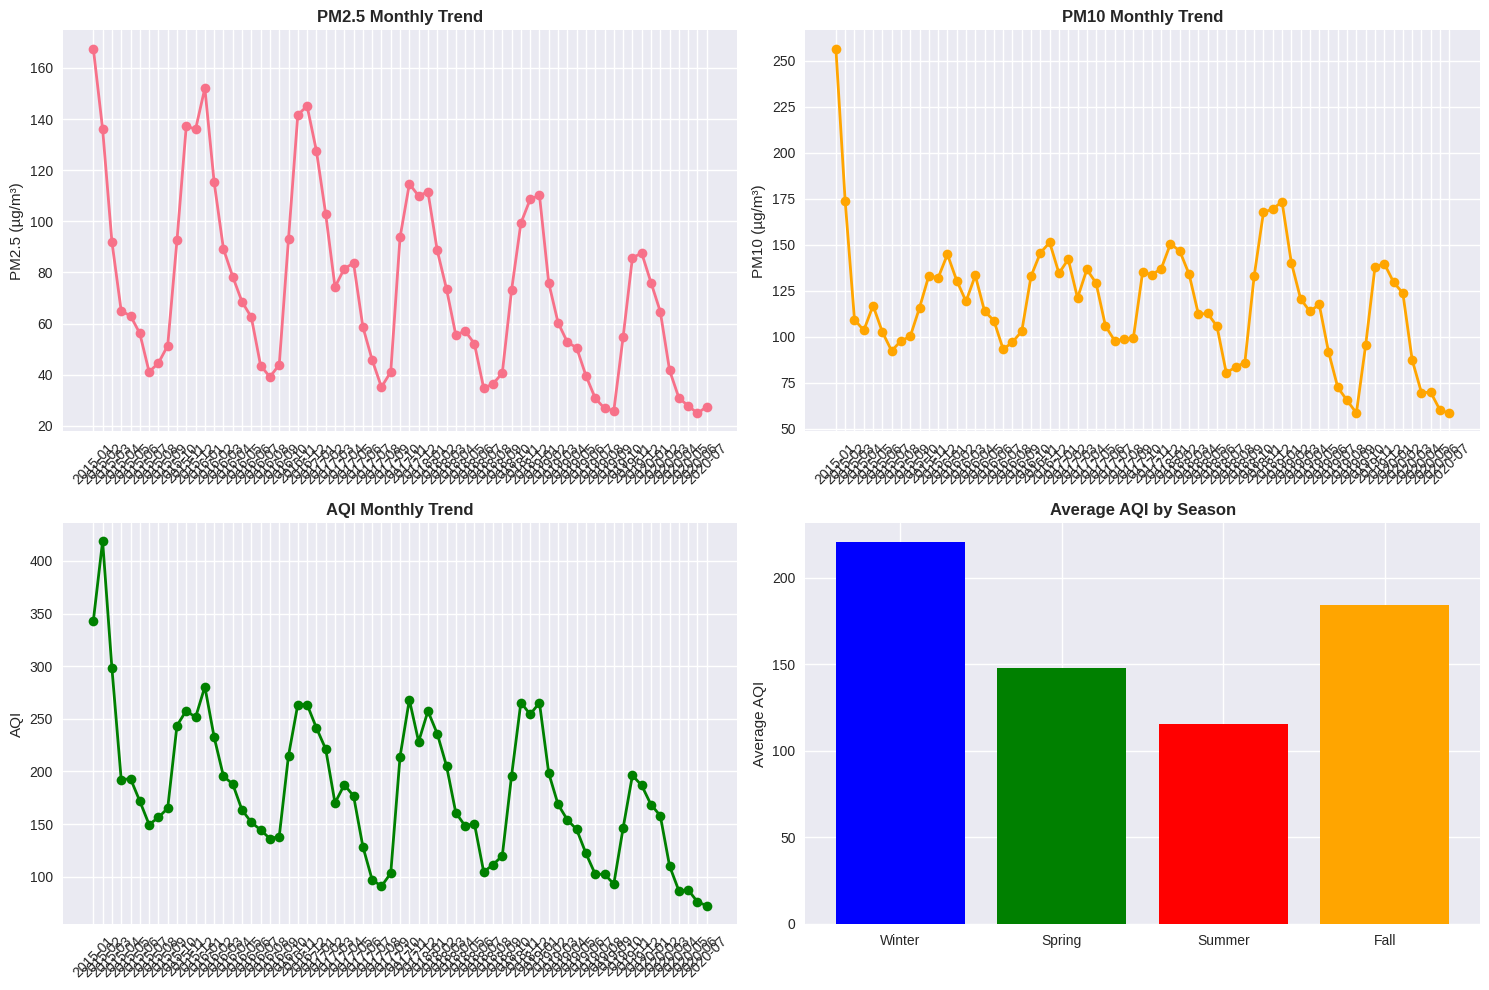


Yearly Average Pollution Levels:
      PM2.5    PM10     AQI
Year                       
2015  80.87  115.07  212.46
2016  88.58  122.57  197.15
2017  82.55  122.99  181.47
2018  68.60  122.86  182.68
2019  58.66  110.32  156.52
2020  43.80   89.27  113.52


In [15]:
print("\n3. TEMPORAL TRENDS ANALYSIS")

# Resample by month for trend analysis
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('YearMonth').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'AQI': 'mean'
}).reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].astype(str)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# PM2.5 trend
axes[0,0].plot(monthly_avg['YearMonth'], monthly_avg['PM2.5'], marker='o', linewidth=2)
axes[0,0].set_title('PM2.5 Monthly Trend', fontweight='bold')
axes[0,0].set_ylabel('PM2.5 (µg/m³)')
axes[0,0].tick_params(axis='x', rotation=45)

# PM10 trend
axes[0,1].plot(monthly_avg['YearMonth'], monthly_avg['PM10'], marker='o', color='orange', linewidth=2)
axes[0,1].set_title('PM10 Monthly Trend', fontweight='bold')
axes[0,1].set_ylabel('PM10 (µg/m³)')
axes[0,1].tick_params(axis='x', rotation=45)

# AQI trend
axes[1,0].plot(monthly_avg['YearMonth'], monthly_avg['AQI'], marker='o', color='green', linewidth=2)
axes[1,0].set_title('AQI Monthly Trend', fontweight='bold')
axes[1,0].set_ylabel('AQI')
axes[1,0].tick_params(axis='x', rotation=45)

# Seasonal analysis
seasonal_avg = df.groupby('Season').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'AQI': 'mean'
}).reset_index()
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
seasonal_avg['Season'] = seasonal_avg['Season'].map(season_map)

axes[1,1].bar(seasonal_avg['Season'], seasonal_avg['AQI'], color=['blue', 'green', 'red', 'orange'])
axes[1,1].set_title('Average AQI by Season', fontweight='bold')
axes[1,1].set_ylabel('Average AQI')

plt.tight_layout()
plt.show()

# Yearly comparison
yearly_stats = df.groupby('Year').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'AQI': 'mean'
}).round(2)

print("\nYearly Average Pollution Levels:")
print(yearly_stats)


4. CITY-WISE ANALYSIS
City-wise Statistics:
                    PM2.5_Mean  PM2.5_Max  PM2.5_Std  PM10_Mean  PM10_Max  \
City                                                                        
Patna                   120.88     306.30      84.52     119.16    276.34   
Delhi                   114.99     306.30      74.05     226.86    420.14   
Gurugram                110.49     306.30      71.73     182.60    420.14   
Lucknow                 108.04     306.30      72.26     100.14    100.14   
Ahmedabad                67.80     306.30      38.99     109.40    335.86   
Kolkata                  64.65     304.74      58.44     116.02    420.14   
Brajrajnagar             63.81     191.33      33.85     123.46    413.89   
Jorapokhar               62.38     217.13      22.63     150.03    420.14   
Guwahati                 61.31     306.30      47.38     111.97    420.14   
Talcher                  61.10     306.30      47.81     163.45    420.14   
Jaipur                   54.67 

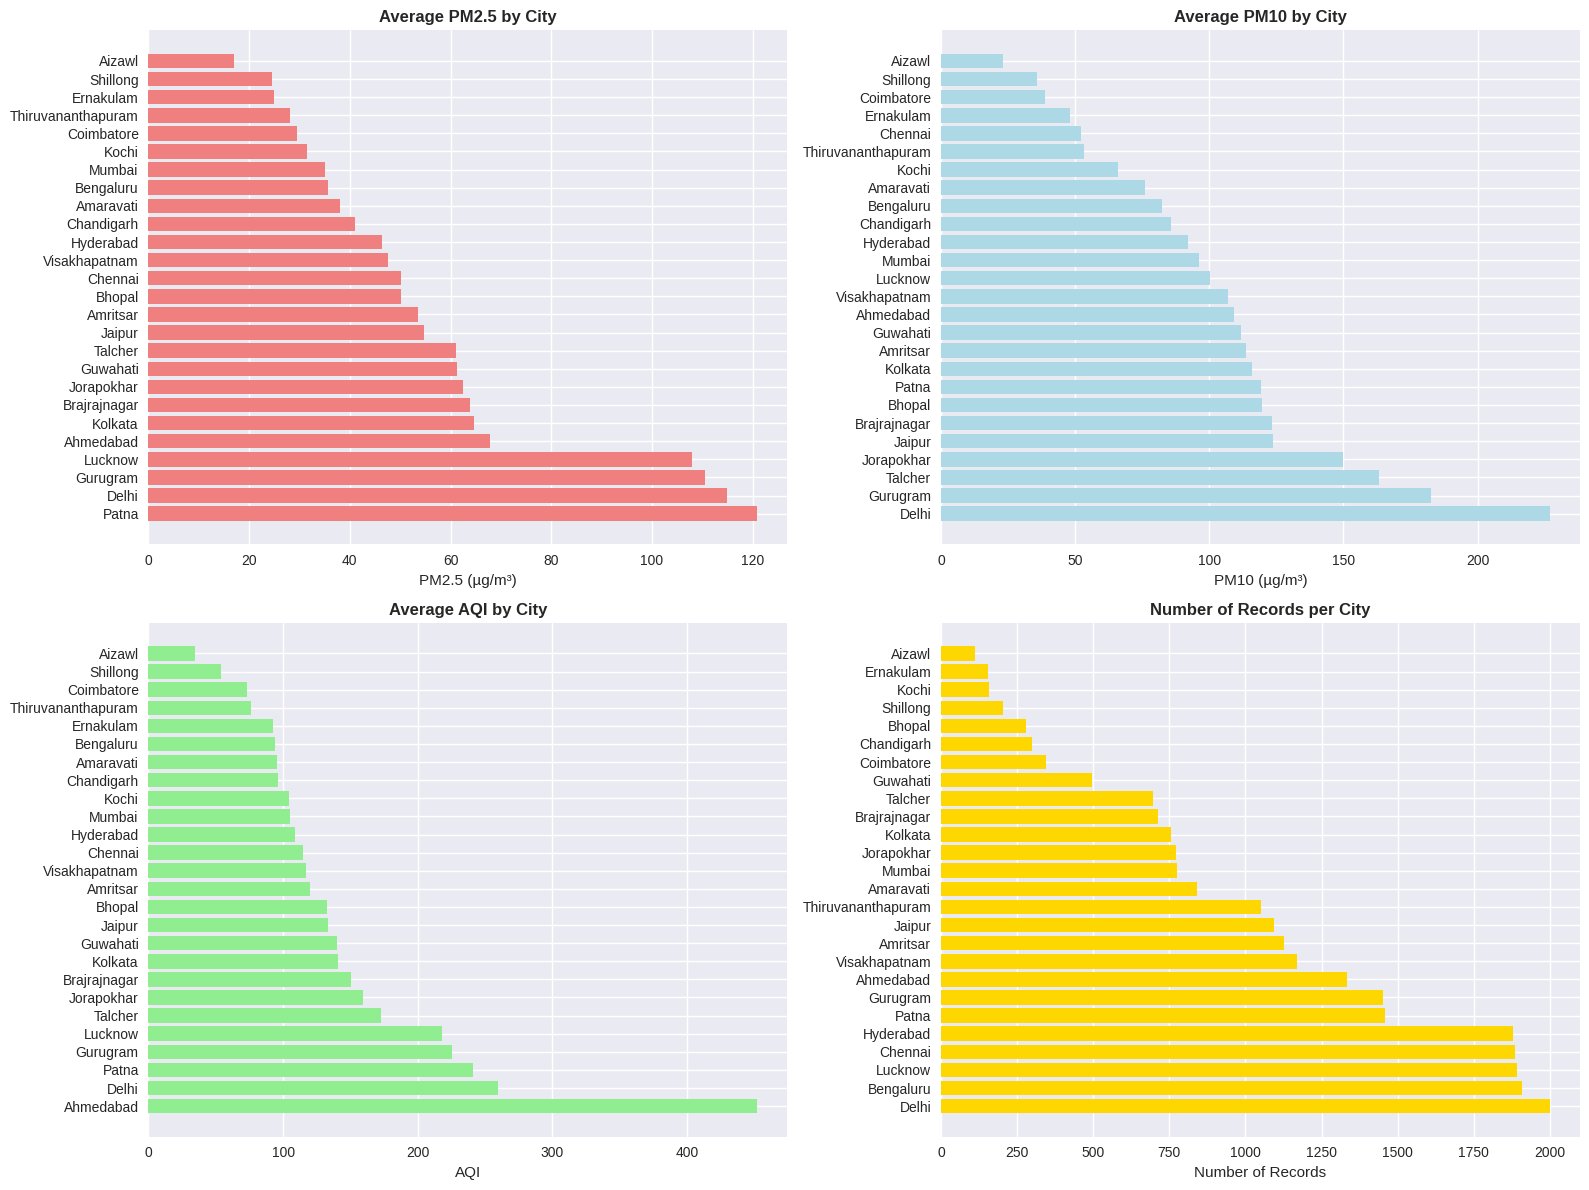

In [16]:
print("\n4. CITY-WISE ANALYSIS")

city_stats = df.groupby('City').agg({
    'PM2.5': ['mean', 'max', 'std'],
    'PM10': ['mean', 'max', 'std'],
    'AQI': ['mean', 'max', 'min'],
    'Date': 'count'
}).round(2)

city_stats.columns = ['PM2.5_Mean', 'PM2.5_Max', 'PM2.5_Std',
                     'PM10_Mean', 'PM10_Max', 'PM10_Std',
                     'AQI_Mean', 'AQI_Max', 'AQI_Min', 'Records']

print("City-wise Statistics:")
print(city_stats.sort_values('PM2.5_Mean', ascending=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PM2.5 by city
city_pm25 = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False)
axes[0,0].barh(city_pm25.index, city_pm25.values, color='lightcoral')
axes[0,0].set_title('Average PM2.5 by City', fontweight='bold')
axes[0,0].set_xlabel('PM2.5 (µg/m³)')

# PM10 by city
city_pm10 = df.groupby('City')['PM10'].mean().sort_values(ascending=False)
axes[0,1].barh(city_pm10.index, city_pm10.values, color='lightblue')
axes[0,1].set_title('Average PM10 by City', fontweight='bold')
axes[0,1].set_xlabel('PM10 (µg/m³)')

# AQI by city
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
axes[1,0].barh(city_aqi.index, city_aqi.values, color='lightgreen')
axes[1,0].set_title('Average AQI by City', fontweight='bold')
axes[1,0].set_xlabel('AQI')

# Records per city
city_counts = df['City'].value_counts()
axes[1,1].barh(city_counts.index, city_counts.values, color='gold')
axes[1,1].set_title('Number of Records per City', fontweight='bold')
axes[1,1].set_xlabel('Number of Records')

plt.tight_layout()
plt.show()


5. CORRELATION ANALYSIS


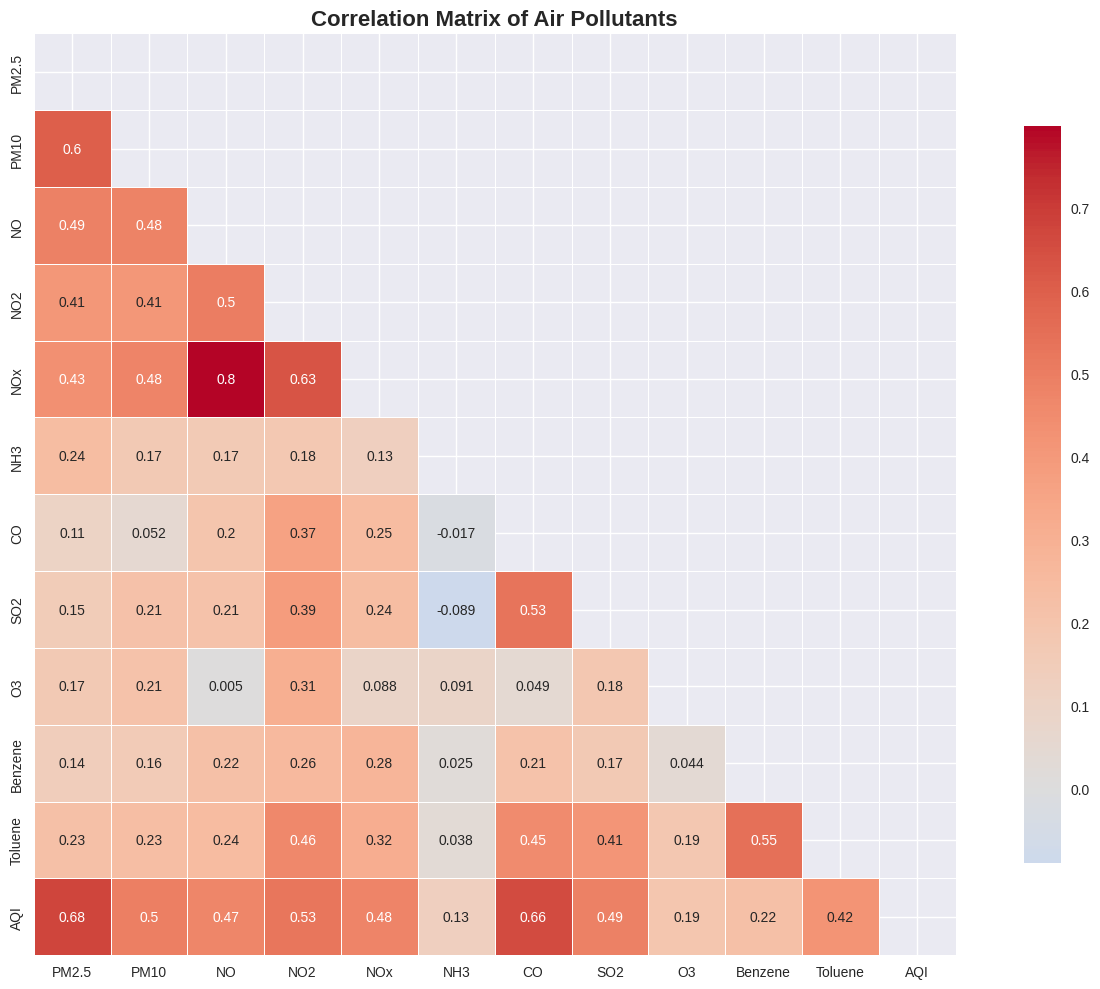


Top features correlated with AQI:
AQI        1.000
PM2.5      0.676
CO         0.659
NO2        0.526
PM10       0.495
SO2        0.488
NOx        0.476
NO         0.472
Toluene    0.420
Benzene    0.223
O3         0.195
NH3        0.131
Name: AQI, dtype: float64


In [17]:
print("\n5. CORRELATION ANALYSIS")

# Select numerical columns for correlation
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Air Pollutants', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with AQI
aqi_correlations = correlation_matrix['AQI'].sort_values(ascending=False)
print("\nTop features correlated with AQI:")
print(aqi_correlations.round(3))


6. DISTRIBUTION AND OUTLIER ANALYSIS


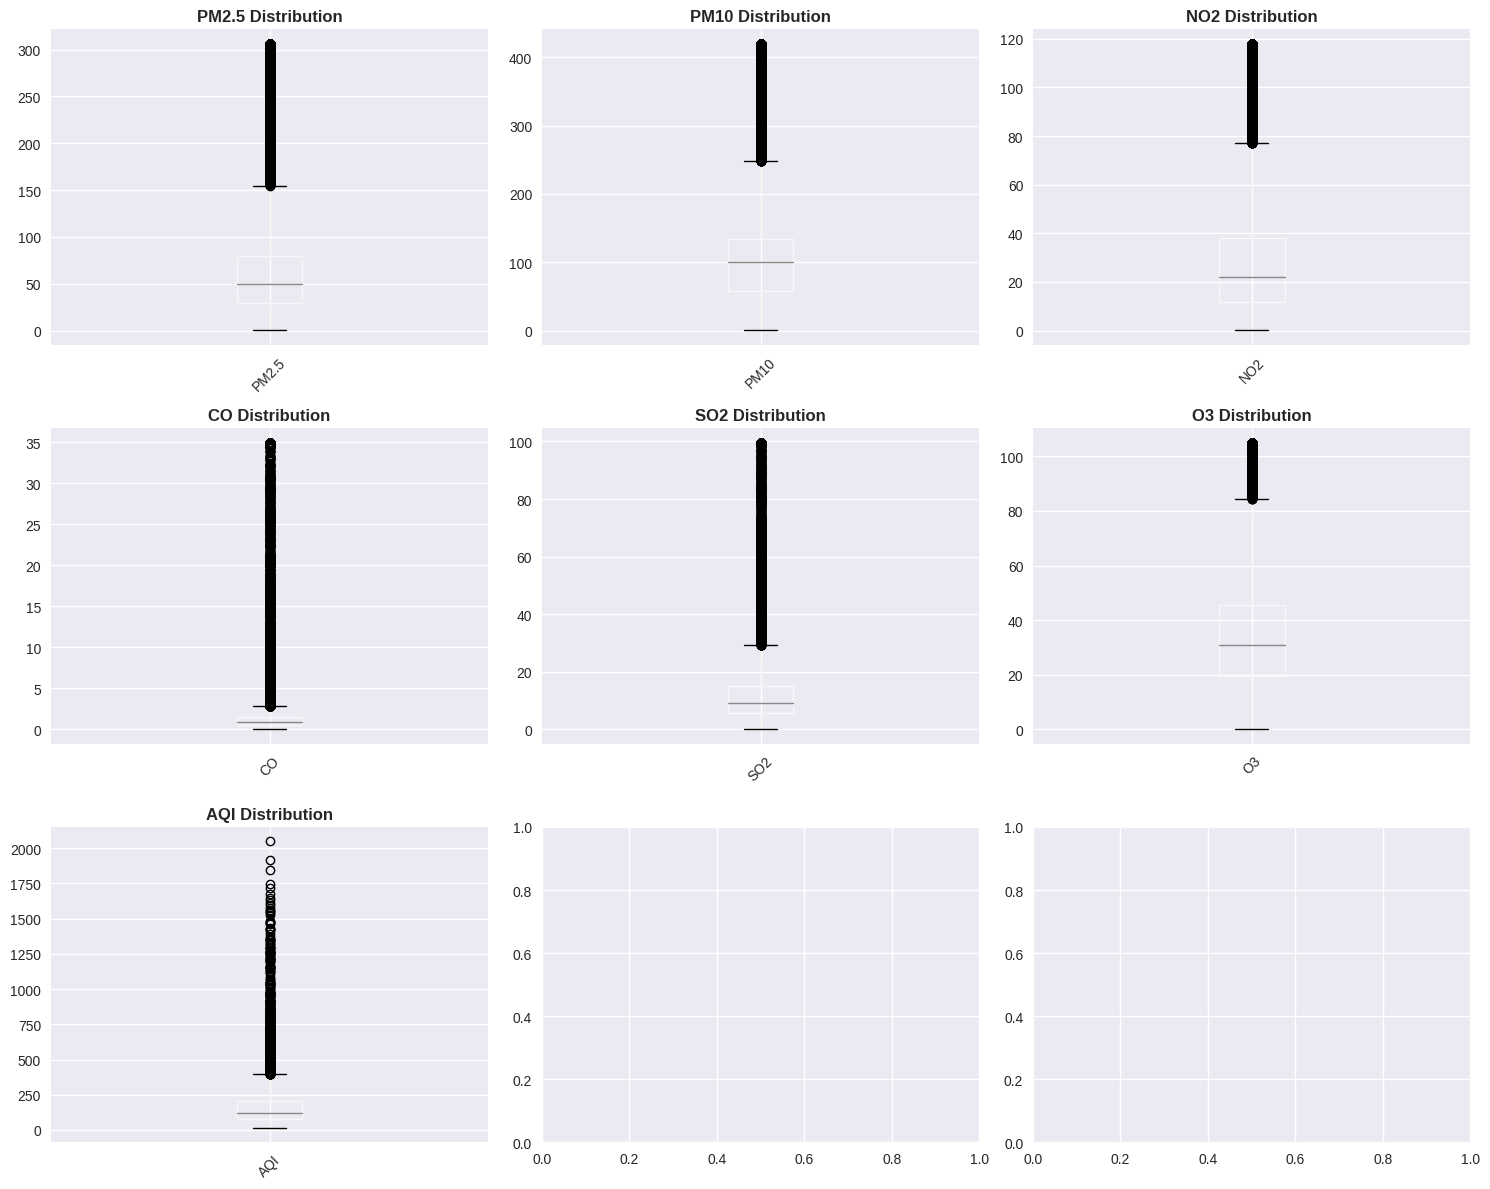


Statistical Summary of Key Pollutants:
          PM2.5      PM10       NO2        CO       SO2        O3       AQI
count  24850.00  24850.00  24850.00  24850.00  24850.00  24850.00  24850.00
mean      66.15    112.73     28.40      2.10     14.15     34.52    166.46
std       56.90     74.91     22.62      4.96     15.73     20.65    140.70
min        0.04      0.03      0.01      0.00      0.01      0.01     13.00
25%       29.48     58.32     11.83      0.58      5.79     19.44     81.00
50%       49.24    100.14     21.84      0.92      9.25     30.97    118.00
75%       79.58    134.22     37.94      1.47     15.20     45.41    208.00
max      306.30    420.14    117.99     34.95     99.62    105.10   2049.00


In [18]:
print("\n6. DISTRIBUTION AND OUTLIER ANALYSIS")

pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    if i < len(axes):
        # Boxplot for outliers
        df.boxplot(column=pollutant, ax=axes[i])
        axes[i].set_title(f'{pollutant} Distribution', fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary of Key Pollutants:")
print(df[pollutants].describe().round(2))


7. AQI CATEGORY ANALYSIS
AQI Category Distribution:
Moderate: 8829 records (35.53%)
Satisfactory: 8224 records (33.09%)
Poor: 2781 records (11.19%)
Very Poor: 2337 records (9.4%)
Good: 1341 records (5.4%)
Severe: 1338 records (5.38%)


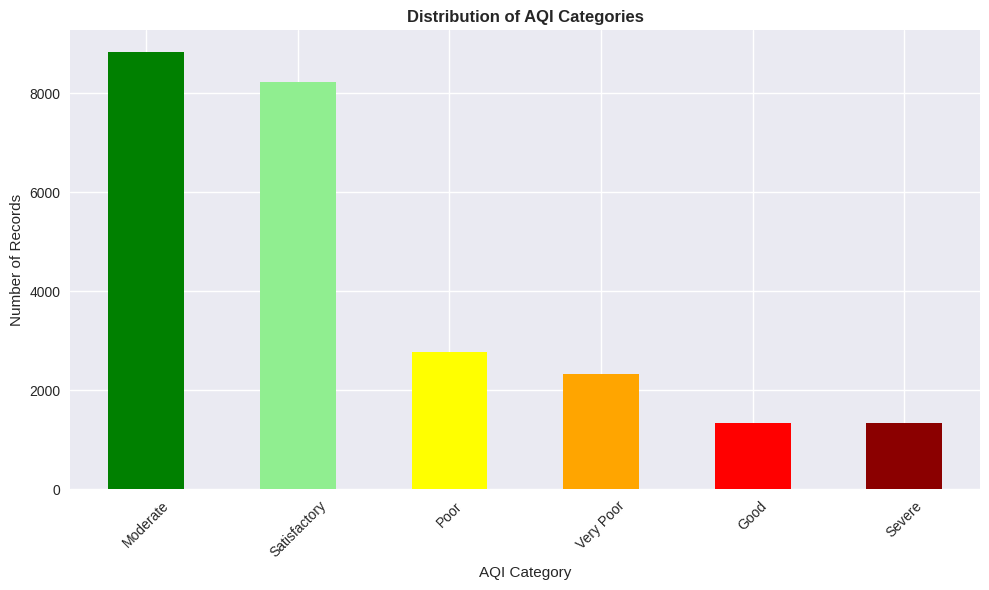


AQI Category Percentage by City:
AQI_Bucket           Good  Moderate   Poor  Satisfactory  Severe  Very Poor
City                                                                       
Ahmedabad            0.07     14.84  17.84          3.22   47.83      16.19
Aizawl              74.77      0.00   0.00         25.23    0.00       0.00
Amaravati           18.79     26.04   5.59         48.63    0.00       0.95
Amritsar             7.46     39.79   5.95         42.01    0.62       4.17
Bengaluru            6.02     32.98   1.88         58.85    0.00       0.26
Bhopal               0.72     59.35  11.15         27.34    0.00       1.44
Brajrajnagar         1.96     59.05  16.83         17.11    0.00       5.05
Chandigarh          16.05     24.75   6.69         51.51    0.00       1.00
Chennai              0.64     42.68   5.84         49.95    0.32       0.58
Coimbatore          12.50      3.78   0.00         83.72    0.00       0.00
Delhi                1.05     25.96  27.11          7.

In [19]:
print("\n7. AQI CATEGORY ANALYSIS")

aqi_distribution = df['AQI_Bucket'].value_counts()
aqi_percentage = (df['AQI_Bucket'].value_counts(normalize=True) * 100).round(2)

print("AQI Category Distribution:")
for category, count, percent in zip(aqi_distribution.index, aqi_distribution.values, aqi_percentage.values):
    print(f"{category}: {count} records ({percent}%)")

plt.figure(figsize=(10, 6))
aqi_distribution.plot(kind='bar', color=['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred'])
plt.title('Distribution of AQI Categories', fontweight='bold')
plt.xlabel('AQI Category')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# AQI ranges by city
city_aqi_ranges = df.groupby(['City', 'AQI_Bucket']).size().unstack(fill_value=0)
city_aqi_percentage = city_aqi_ranges.div(city_aqi_ranges.sum(axis=1), axis=0) * 100

print("\nAQI Category Percentage by City:")
print(city_aqi_percentage.round(2))


8. ADVANCED TIME SERIES INSIGHTS


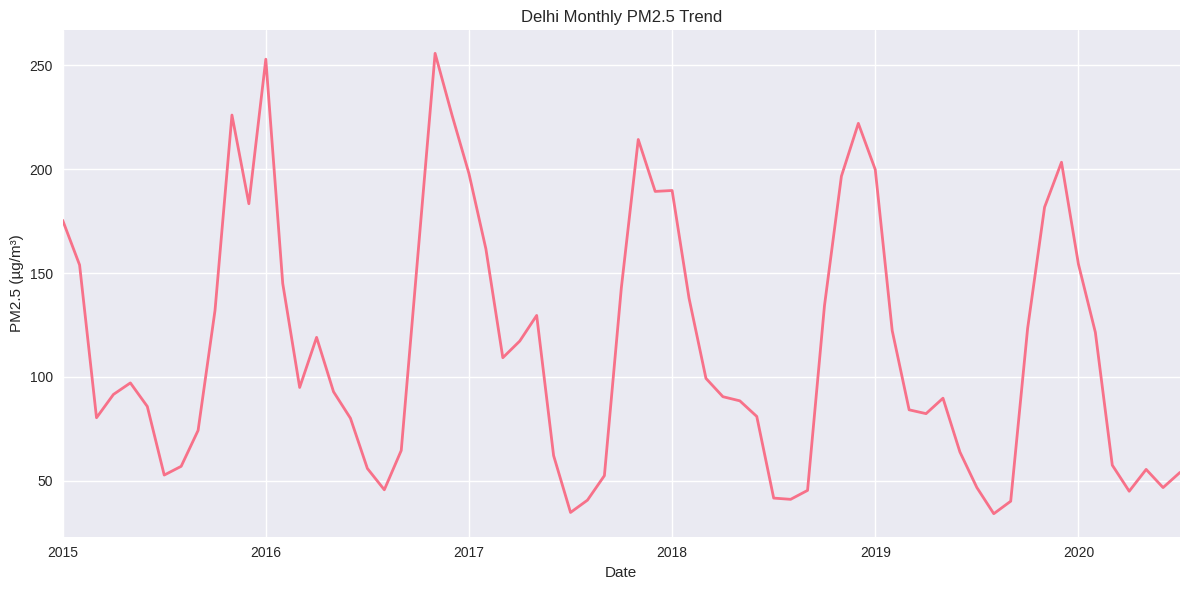

<Figure size 1200x600 with 0 Axes>

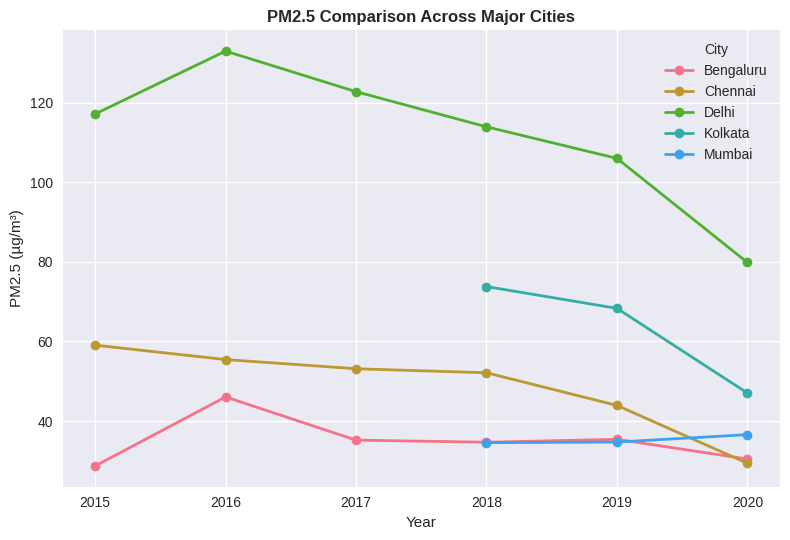

In [20]:
print("\n8. ADVANCED TIME SERIES INSIGHTS")

# Check if Delhi data exists
if 'Delhi' in df['City'].unique():
    # Filter Delhi data and ensure we have numeric columns only
    delhi_data = df[df['City'] == 'Delhi'].copy()
    delhi_data.set_index('Date', inplace=True)

    # Resample by month, taking mean of numeric columns only
    numeric_cols = delhi_data.select_dtypes(include=[np.number]).columns
    delhi_monthly = delhi_data[numeric_cols].resample('M').mean()

    # Plot Delhi's PM2.5 trend
    plt.figure(figsize=(12, 6))
    delhi_monthly['PM2.5'].plot(title='Delhi Monthly PM2.5 Trend', linewidth=2)
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Compare multiple cities
    cities_to_compare = ['Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata']
    available_cities = [city for city in cities_to_compare if city in df['City'].unique()]

    if available_cities:
        city_comparison = df[df['City'].isin(available_cities)].groupby(['City', 'Year'])['PM2.5'].mean().unstack(level=0)

        plt.figure(figsize=(12, 6))
        city_comparison.plot(marker='o', linewidth=2)
        plt.title('PM2.5 Comparison Across Major Cities', fontweight='bold')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.xlabel('Year')
        plt.grid(True)
        plt.legend(title='City')
        plt.tight_layout()
        plt.show()
else:
    print("Delhi data not available for time series analysis")

In [21]:
print("\n CRITICAL INSIGHTS:")

# Insight 1: Most polluted cities
if 'PM2.5' in df.columns and 'City' in df.columns:
    top_polluted = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(3)
    print(f"1. Most Polluted Cities (PM2.5): {', '.join(top_polluted.index.tolist())}")

# Insight 2: Seasonal patterns
if 'Season' in df.columns and 'AQI' in df.columns:
    seasonal_pattern = df.groupby('Season')['AQI'].mean().sort_values(ascending=False)
    if not seasonal_pattern.empty:
        worst_season = season_map[seasonal_pattern.idxmax()]
        print(f"2. Worst Air Quality Season: {worst_season} (Avg AQI: {seasonal_pattern.max():.1f})")

# Insight 3: Strongest correlations
if 'AQI' in correlation_matrix.columns:
    strong_corr = correlation_matrix['AQI'].abs().sort_values(ascending=False).head(4)
    print(f"3. Strongest AQI Correlations: {strong_corr.index[1:].tolist()}")

# Insight 4: Missing data impact
'''if not missing_data.empty:
    print(f"4. Data Quality: {missing_data.idxmax()} has highest missing values ({missing_data.max():.1f}%)")'''

# Insight 5: Temporal trends
if 'Year' in df.columns and 'AQI' in df.columns:
    yearly_trend = df.groupby('Year')['AQI'].mean()
    if len(yearly_trend) > 1:
        trend_direction = "improving" if yearly_trend.iloc[-1] < yearly_trend.iloc[0] else "worsening"
        print(f"5. Overall Trend: Air quality is {trend_direction} over time")

# Insight 6: Pollution hotspots
if 'PM2.5' in df.columns:
    pm25_exceedance = (df['PM2.5'] > 60).mean() * 100  # WHO guideline
    print(f"6. Health Risk: {pm25_exceedance:.1f}% of days exceed WHO PM2.5 guidelines")

print("\n🎯 RECOMMENDATIONS:")
print("- Focus on cities with consistently high pollution levels")
print("- Implement seasonal mitigation strategies")
print("- Monitor strongly correlated pollutants for early warning")
print("- Improve data collection for missing parameters")
print("- Consider time-series models for forecasting")

print("\n📊 EDA COMPLETE - Ready for modeling preparation!")


 CRITICAL INSIGHTS:
1. Most Polluted Cities (PM2.5): Patna, Delhi, Gurugram
2. Worst Air Quality Season: Winter (Avg AQI: 220.6)
3. Strongest AQI Correlations: ['PM2.5', 'CO', 'NO2']
5. Overall Trend: Air quality is improving over time
6. Health Risk: 40.0% of days exceed WHO PM2.5 guidelines

🎯 RECOMMENDATIONS:
- Focus on cities with consistently high pollution levels
- Implement seasonal mitigation strategies
- Monitor strongly correlated pollutants for early warning
- Improve data collection for missing parameters
- Consider time-series models for forecasting

📊 EDA COMPLETE - Ready for modeling preparation!


# **PCA**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [23]:
# Select numerical pollutant columns for PCA
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

# Filter only available pollutants
available_pollutants = [p for p in pollutants if p in df.columns]
print(f"Available pollutants for PCA: {available_pollutants}")

# Extract the pollutant data
X = df[available_pollutants].copy()

# Handle missing values - impute with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Standardize the data (crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(f"Original data shape: {X_scaled.shape}")
print(f"Missing values after imputation: {np.isnan(X_scaled).sum()}")

Available pollutants for PCA: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
Original data shape: (24850, 11)
Missing values after imputation: 0


In [24]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create PCA results dataframe
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
pca_df['City'] = df['City'].values
pca_df['Date'] = df['Date'].values

print("PCA completed successfully!")

PCA completed successfully!



EXPLAINED VARIANCE ANALYSIS:
PC1: 0.356 (35.6%) - Cumulative: 0.356 (35.6%)
PC2: 0.152 (15.2%) - Cumulative: 0.508 (50.8%)
PC3: 0.102 (10.2%) - Cumulative: 0.609 (60.9%)
PC4: 0.090 (9.0%) - Cumulative: 0.699 (69.9%)
PC5: 0.079 (7.9%) - Cumulative: 0.778 (77.8%)
PC6: 0.064 (6.4%) - Cumulative: 0.843 (84.3%)
PC7: 0.042 (4.2%) - Cumulative: 0.885 (88.5%)
PC8: 0.037 (3.7%) - Cumulative: 0.921 (92.1%)
PC9: 0.033 (3.3%) - Cumulative: 0.954 (95.4%)
PC10: 0.030 (3.0%) - Cumulative: 0.985 (98.5%)
PC11: 0.015 (1.5%) - Cumulative: 1.000 (100.0%)


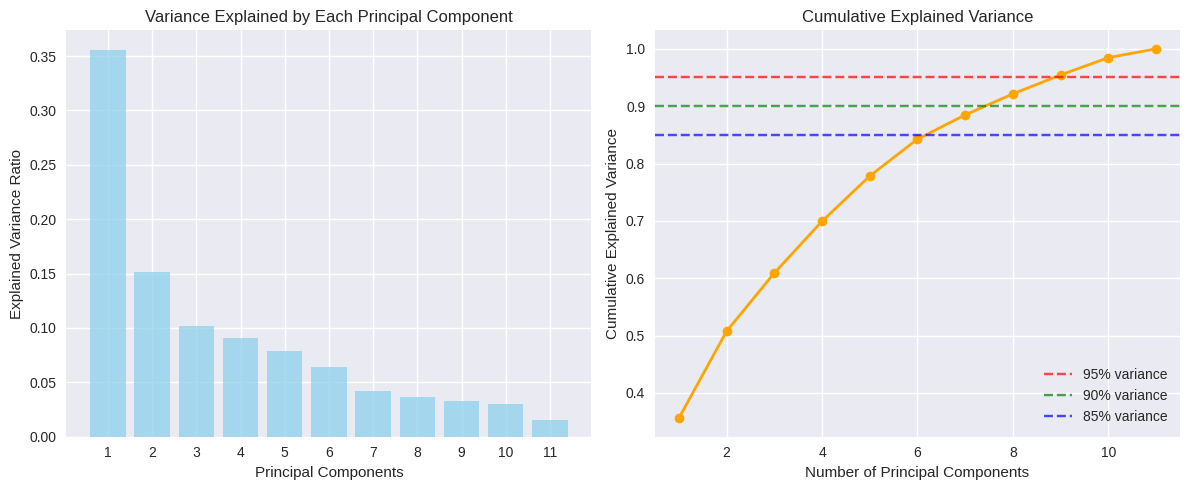


Optimal number of components for 90% variance: 8
Optimal number of components for 95% variance: 9


In [25]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nEXPLAINED VARIANCE ANALYSIS:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%) - Cumulative: {cum_var:.3f} ({cum_var*100:.1f}%)")

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, len(explained_variance)+1))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', linewidth=2, color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', alpha=0.7, label='90% variance')
plt.axhline(y=0.85, color='b', linestyle='--', alpha=0.7, label='85% variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal number of components
optimal_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
optimal_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nOptimal number of components for 90% variance: {optimal_components_90}")
print(f"Optimal number of components for 95% variance: {optimal_components_95}")


COMPONENT LOADINGS (First 5 Components):
           PC1    PC2    PC3    PC4    PC5
PM2.5    0.642 -0.426 -0.108 -0.032 -0.085
PM10     0.653 -0.403 -0.123 -0.077 -0.253
NO       0.742 -0.333  0.368 -0.141  0.015
NO2      0.798  0.028 -0.128 -0.070  0.080
NOx      0.795 -0.230  0.302 -0.117 -0.023
NH3      0.221 -0.417 -0.261  0.415  0.714
CO       0.484  0.598  0.054 -0.226  0.380
SO2      0.522  0.531 -0.141 -0.381  0.090
O3       0.291  0.033 -0.838  0.015 -0.245
Benzene  0.461  0.325  0.230  0.672 -0.250
Toluene  0.635  0.489 -0.028  0.357 -0.059


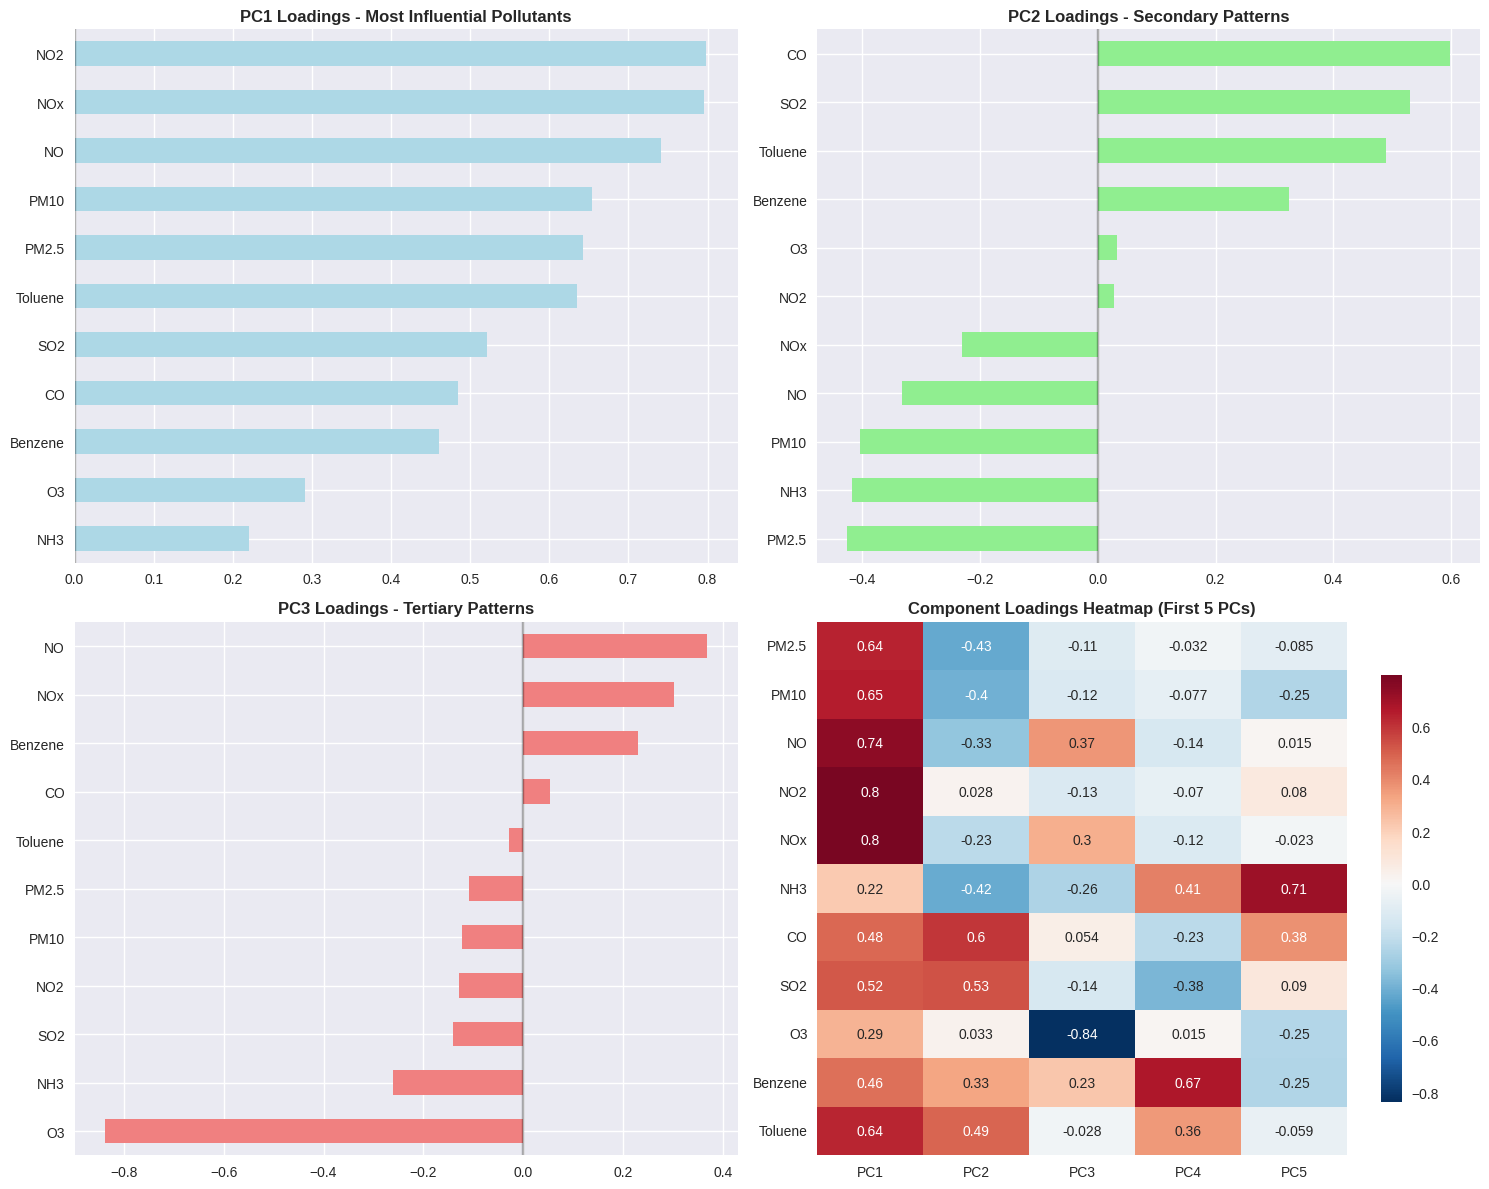

In [26]:
# Get component loadings (feature contributions)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create loadings dataframe
loadings_df = pd.DataFrame(loadings,
                          columns=pca_columns,
                          index=available_pollutants)

print("\nCOMPONENT LOADINGS (First 5 Components):")
print(loadings_df.iloc[:, :5].round(3))

# Visualize loadings for first few components
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# PC1 Loadings
loadings_df['PC1'].sort_values().plot(kind='barh', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('PC1 Loadings - Most Influential Pollutants', fontweight='bold')
axes[0,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# PC2 Loadings
loadings_df['PC2'].sort_values().plot(kind='barh', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('PC2 Loadings - Secondary Patterns', fontweight='bold')
axes[0,1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# PC3 Loadings
loadings_df['PC3'].sort_values().plot(kind='barh', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('PC3 Loadings - Tertiary Patterns', fontweight='bold')
axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Heatmap of first 5 components
sns.heatmap(loadings_df.iloc[:, :5], annot=True, cmap='RdBu_r', center=0,
            ax=axes[1,1], cbar_kws={"shrink": .8})
axes[1,1].set_title('Component Loadings Heatmap (First 5 PCs)', fontweight='bold')

plt.tight_layout()
plt.show()

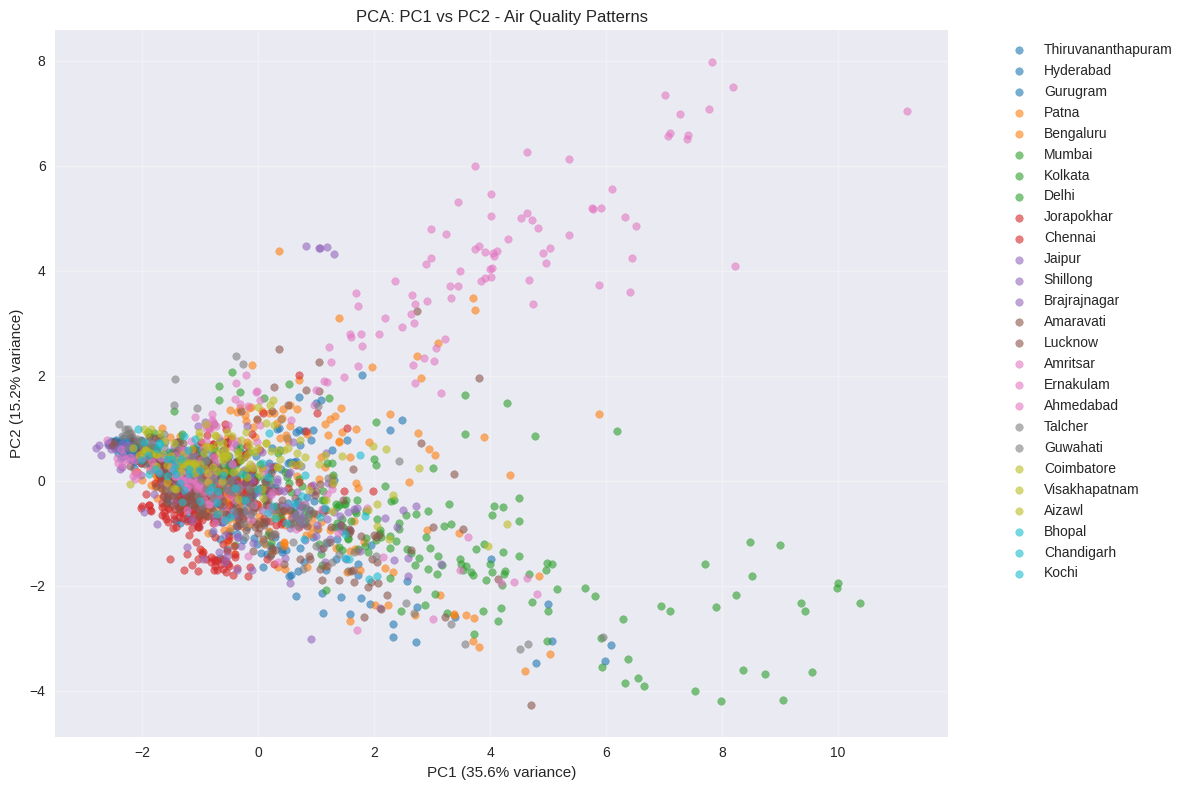

In [27]:
# 2D Scatter plot of first two components
plt.figure(figsize=(12, 8))

# Sample data for better visualization (if large dataset)
sample_size = min(2000, len(pca_df))
sample_indices = np.random.choice(len(pca_df), sample_size, replace=False)

# Color by city if available
if 'City' in pca_df.columns:
    cities = pca_df['City'].iloc[sample_indices]
    unique_cities = cities.unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_cities)))

    for i, city in enumerate(unique_cities):
        city_mask = cities == city
        plt.scatter(pca_df['PC1'].iloc[sample_indices][city_mask],
                   pca_df['PC2'].iloc[sample_indices][city_mask],
                   alpha=0.6, label=city, color=colors[i], s=30)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    plt.scatter(pca_df['PC1'].iloc[sample_indices],
               pca_df['PC2'].iloc[sample_indices],
               alpha=0.6, s=30)

plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
plt.title('PCA: PC1 vs PC2 - Air Quality Patterns')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
# Analyze top contributors for each component
for i in range(min(5, len(pca_columns))):
    pc_name = pca_columns[i]
    loadings = loadings_df[pc_name]

    # Get top 3 positive and negative contributors
    top_positive = loadings.nlargest(3)
    top_negative = loadings.nsmallest(3)

    print(f"\n{pc_name} ({explained_variance[i]*100:.1f}% variance):")
    print("Positive contributors (high values → high PC score):")
    for pollutant, loading in top_positive.items():
        print(f"  - {pollutant}: {loading:.3f}")

    print("Negative contributors (low values → high PC score):")
    for pollutant, loading in top_negative.items():
        print(f"  - {pollutant}: {loading:.3f}")

    # Interpret the component
    if i == 0:
        print("Interpretation: PC1 represents overall pollution intensity")
    elif i == 1:
        print("Interpretation: PC2 may represent specific pollution sources or patterns")


PC1 (35.6% variance):
Positive contributors (high values → high PC score):
  - NO2: 0.798
  - NOx: 0.795
  - NO: 0.742
Negative contributors (low values → high PC score):
  - NH3: 0.221
  - O3: 0.291
  - Benzene: 0.461
Interpretation: PC1 represents overall pollution intensity

PC2 (15.2% variance):
Positive contributors (high values → high PC score):
  - CO: 0.598
  - SO2: 0.531
  - Toluene: 0.489
Negative contributors (low values → high PC score):
  - PM2.5: -0.426
  - NH3: -0.417
  - PM10: -0.403
Interpretation: PC2 may represent specific pollution sources or patterns

PC3 (10.2% variance):
Positive contributors (high values → high PC score):
  - NO: 0.368
  - NOx: 0.302
  - Benzene: 0.230
Negative contributors (low values → high PC score):
  - O3: -0.838
  - NH3: -0.261
  - SO2: -0.141

PC4 (9.0% variance):
Positive contributors (high values → high PC score):
  - Benzene: 0.672
  - NH3: 0.415
  - Toluene: 0.357
Negative contributors (low values → high PC score):
  - SO2: -0.381
  

In [29]:
# Create reduced dataset with optimal number of components
optimal_components = optimal_components_90  # Using 90% variance threshold
X_reduced = X_pca[:, :optimal_components]

print(f"\nDIMENSIONALITY REDUCTION RESULTS:")
print(f"Original features: {len(available_pollutants)}")
print(f"Reduced features: {optimal_components}")
print(f"Variance retained: {cumulative_variance[optimal_components-1]*100:.1f}%")

# Create final dataset for modeling
final_columns = [f'PC{i+1}' for i in range(optimal_components)]
final_df = pd.DataFrame(X_reduced, columns=final_columns)

# Add back metadata if needed
final_df['City'] = df['City'].values
final_df['Date'] = df['Date'].values
if 'AQI' in df.columns:
    final_df['AQI'] = df['AQI'].values
if 'AQI_Bucket' in df.columns:
    final_df['AQI_Bucket'] = df['AQI_Bucket'].values

print(f"\nFinal reduced dataset shape: {final_df.shape}")
print("First few rows of reduced dataset:")
print(final_df.head().round(3))


DIMENSIONALITY REDUCTION RESULTS:
Original features: 11
Reduced features: 8
Variance retained: 92.1%

Final reduced dataset shape: (24850, 12)
First few rows of reduced dataset:
     PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8       City  \
0  0.567  1.153 -1.437 -1.750  0.250  0.339 -0.660  0.807  Ahmedabad   
1  1.372  1.705 -2.589 -2.089  0.339 -0.374 -0.034  2.048  Ahmedabad   
2  2.791  2.916 -2.688 -3.134  1.196 -0.178  0.198  3.101  Ahmedabad   
3  4.651  3.438 -2.018 -4.101  2.088 -0.210  1.024  4.059  Ahmedabad   
4  4.489  2.600 -1.906 -3.629  1.855 -0.045  2.096  4.478  Ahmedabad   

        Date    AQI AQI_Bucket  
0 2015-01-29  209.0       Poor  
1 2015-01-30  328.0  Very Poor  
2 2015-01-31  514.0     Severe  
3 2015-02-01  782.0     Severe  
4 2015-02-02  914.0     Severe  


In [30]:
print("\nKEY FINDINGS:")

# Insight 1: Dimensionality reduction
print(f"1. Dimensionality Reduction: {len(available_pollutants)} → {optimal_components} features")
print(f"   (Retains {cumulative_variance[optimal_components-1]*100:.1f}% of variance)")

# Insight 2: Most important pollutants
pc1_loadings = loadings_df['PC1'].abs().sort_values(ascending=False)
top_3_pollutants = pc1_loadings.head(3).index.tolist()
print(f"2. Most influential pollutants: {', '.join(top_3_pollutants)}")

# Insight 3: Correlation patterns
if len(available_pollutants) >= 2:
    correlation_before = np.corrcoef(X_imputed.T)
    correlation_after = np.corrcoef(X_reduced.T)
    print(f"3. Correlation reduction: Complex patterns simplified")

print("\n🎯 RECOMMENDATIONS FOR MODELING:")
print("✓ Use PC1-PC5 as features instead of original pollutants")
print("✓ Focus on interpretation of component loadings")
print("✓ Consider clustering based on PCA scores")
print("✓ Use reduced dimensions for faster training and less overfitting")
print("✓ Combine PCA with temporal features for time series analysis")

print("\n📊 PCA ANALYSIS COMPLETE - Ready for advanced modeling!")


KEY FINDINGS:
1. Dimensionality Reduction: 11 → 8 features
   (Retains 92.1% of variance)
2. Most influential pollutants: NO2, NOx, NO
3. Correlation reduction: Complex patterns simplified

🎯 RECOMMENDATIONS FOR MODELING:
✓ Use PC1-PC5 as features instead of original pollutants
✓ Focus on interpretation of component loadings
✓ Consider clustering based on PCA scores
✓ Use reduced dimensions for faster training and less overfitting
✓ Combine PCA with temporal features for time series analysis

📊 PCA ANALYSIS COMPLETE - Ready for advanced modeling!


# **MODELLING**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling1D
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


2025-09-14 18:37:43.508510: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-14 18:37:43.511068: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-14 18:37:43.569860: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-14 18:37:43.571049: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-14 18:37:44.669968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [33]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached google_auth-2.40.3-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9

In [35]:
# Load your final dataset (assuming it's prepared)
# If you have the PCA-reduced data, use that, otherwise use original features
try:
    # Try to load PCA data if available
    final_df = pd.read_csv('air_quality_processed.csv')
    print("Using PCA-reduced dataset")
except:
    # Use original data with proper preprocessing
    print("Using original dataset with preprocessing")
    # Select features and target
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
    available_features = [f for f in features if f in df.columns]

    X = df[available_features].fillna(df[available_features].median())
    y = df['AQI'].values  # Regression task

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    final_df = pd.DataFrame(X_scaled, columns=available_features)
    final_df['AQI'] = y

print(f"Dataset shape: {final_df.shape}")

# Prepare features and target
X = final_df.drop('AQI', axis=1).values
y = final_df['AQI'].values

# For classification (optional - if you want AQI_Bucket prediction)
if 'AQI_Bucket' in final_df.columns:
    le = LabelEncoder()
    y_class = le.fit_transform(final_df['AQI_Bucket'])
    print("Class distribution:", np.unique(y_class, return_counts=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Reshape data for time series models (samples, timesteps, features)
# Since we don't have explicit time steps, we'll use feature dimension as timesteps
timesteps = 1  # Each sample is one time step
n_features = X_train.shape[1]

X_train_3d = X_train.reshape(X_train.shape[0], timesteps, n_features)
X_test_3d = X_test.reshape(X_test.shape[0], timesteps, n_features)

print(f"3D shape for RNN/LSTM: {X_train_3d.shape}")

Using original dataset with preprocessing
Dataset shape: (24850, 12)
Training set: (19880, 11), Test set: (4970, 11)
3D shape for RNN/LSTM: (19880, 1, 11)


In [36]:
# Common parameters
input_shape = (timesteps, n_features)
n_epochs = 100
batch_size = 32
validation_split = 0.1

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(f'{model_name}: Actual vs Predicted AQI')
    plt.show()

    return {'mse': mse, 'mae': mae, 'r2': r2, 'model': model_name}

RNN Model



TRAINING RNN MODEL
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4864      
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8513 (33.25 KB)
Traina

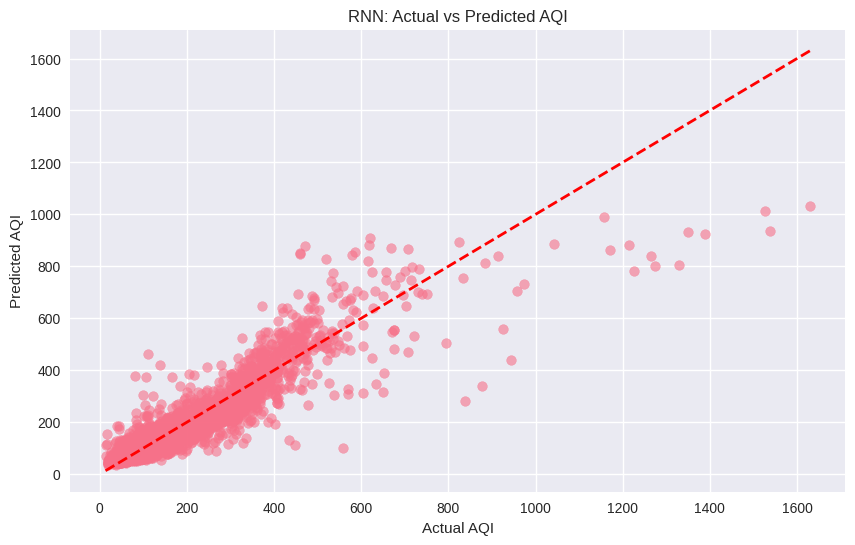

In [37]:
def build_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(64, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        SimpleRNN(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1)  # Regression output
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

print("\n" + "="*50)
print("TRAINING RNN MODEL")
print("="*50)

rnn_model = build_rnn_model(input_shape)
rnn_model.summary()

# Train RNN
rnn_history = rnn_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate RNN
rnn_metrics = evaluate_model(rnn_model, X_test_3d, y_test, "RNN")

LSTM Model


TRAINING LSTM MODEL
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            71680     
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (Non

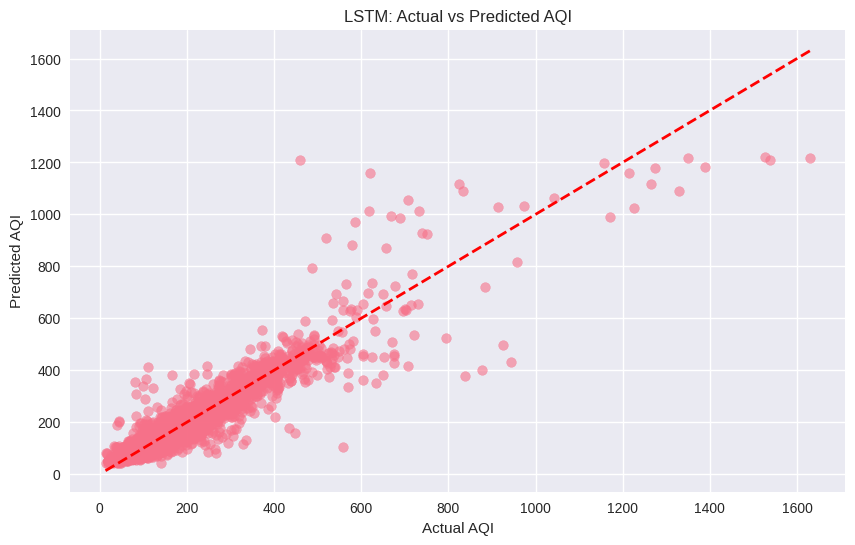

In [38]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(0.4),
        LSTM(64, activation='tanh', return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Regression output
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

print("\n" + "="*50)
print("TRAINING LSTM MODEL")
print("="*50)

lstm_model = build_lstm_model(input_shape)
lstm_model.summary()

# Train LSTM
lstm_history = lstm_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate LSTM
lstm_metrics = evaluate_model(lstm_model, X_test_3d, y_test, "LSTM")

BiLSTM model


TRAINING BiLSTM MODEL
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1, 256)            143360    
 al)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 1, 256)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 1, 128)            164352    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 1, 128)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                               

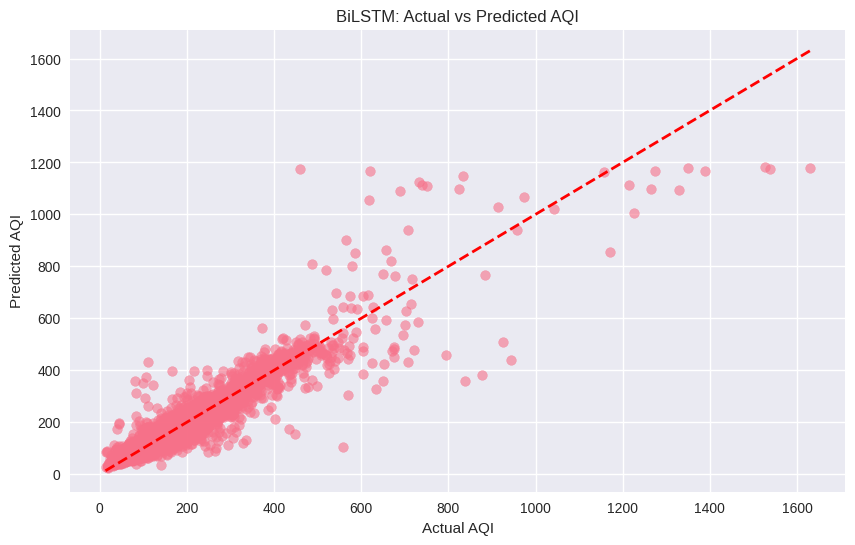

In [39]:
def build_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=input_shape),
        Dropout(0.4),
        Bidirectional(LSTM(64, activation='tanh', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32, activation='tanh')),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Regression output
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

print("\n" + "="*50)
print("TRAINING BiLSTM MODEL")
print("="*50)

bilstm_model = build_bilstm_model(input_shape)
bilstm_model.summary()

# Train BiLSTM
bilstm_history = bilstm_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate BiLSTM
bilstm_metrics = evaluate_model(bilstm_model, X_test_3d, y_test, "BiLSTM")

CNN Model


TRAINING CNN MODEL (CORRECTED)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             768       
                                                                 
 dropout_8 (Dropout)         (None, 1, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            8320      
                                                                 
 dropout_9 (Dropout)         (None, 1, 128)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 256)            33024     
                                                                 
 dropout_10 (Dropout)        (None, 1, 256)            0         
                                                                 
 global_average_poolin

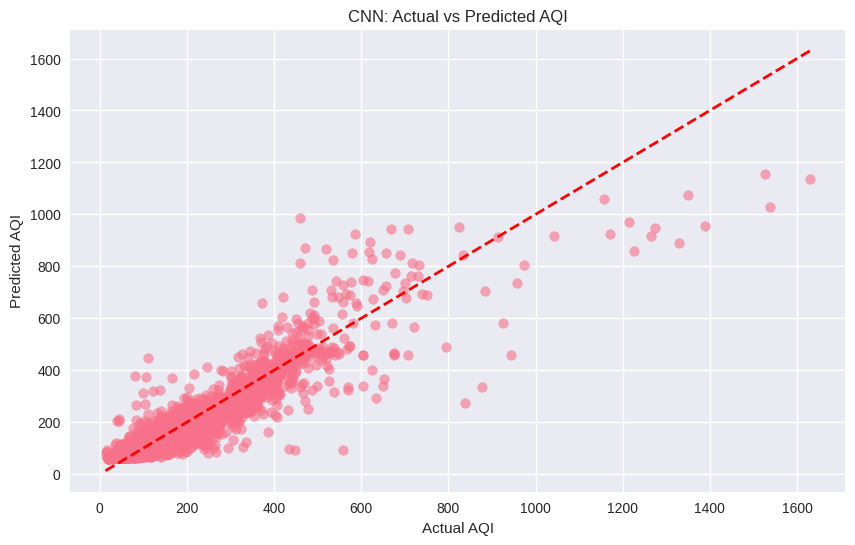

In [40]:
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=1, activation='relu', input_shape=input_shape, padding='same'),
        Dropout(0.3),

        Conv1D(128, kernel_size=1, activation='relu', padding='same'),
        Dropout(0.4),

        Conv1D(256, kernel_size=1, activation='relu', padding='same'),
        Dropout(0.4),

        GlobalAveragePooling1D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
    return model

print("\n" + "="*50)
print("TRAINING CNN MODEL (CORRECTED)")
print("="*50)

cnn_model = build_cnn_model(input_shape)
cnn_model.summary()

# Train CNN
cnn_history = cnn_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate CNN
cnn_metrics = evaluate_model(cnn_model, X_test_3d, y_test, "CNN")

COMPARATIVE ANALYSIS AND ABLATION STUDY

Model Performance Comparison:
    model        mse      mae      r2
0     RNN  2765.6230  29.2145  0.8490
1    LSTM  2010.1605  23.7856  0.8902
2  BiLSTM  2078.7874  23.6244  0.8865
3     CNN  2520.0111  28.1718  0.8624


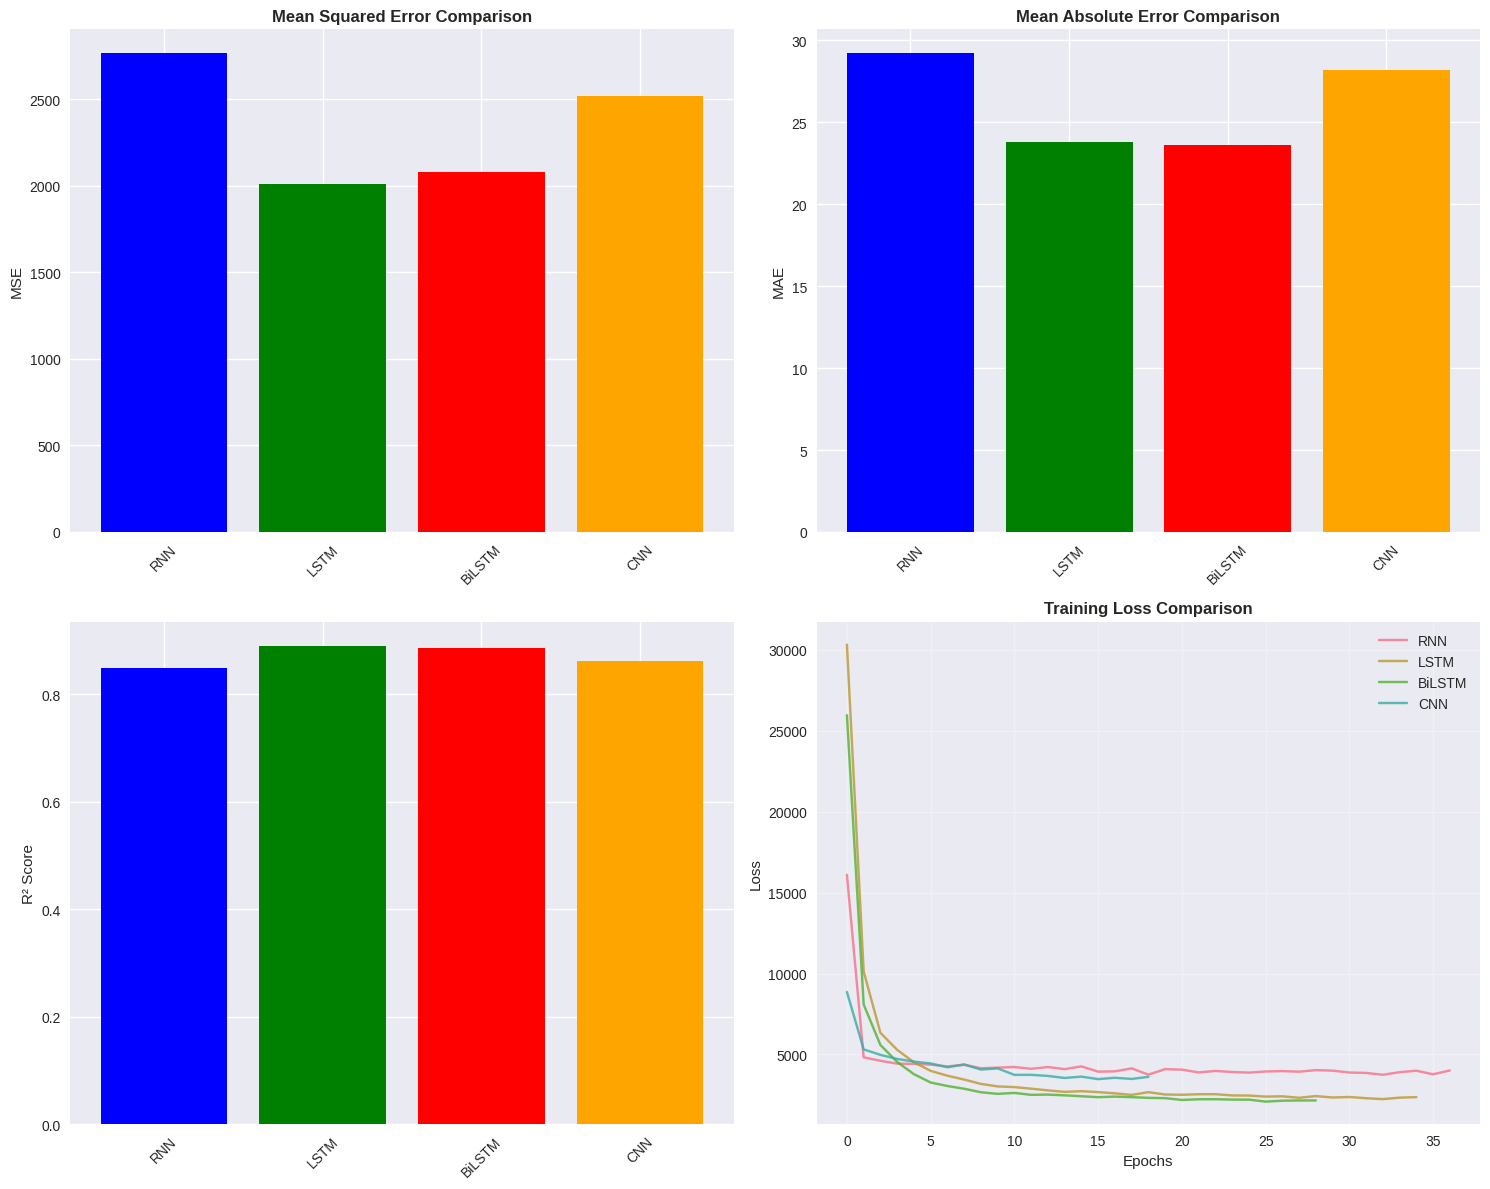


ABLATION STUDY - MODEL COMPLEXITY:
RNN: 8,513 trainable parameters
LSTM: 134,049 trainable parameters
BiLSTM: 349,985 trainable parameters
CNN: 83,329 trainable parameters


In [42]:
print("COMPARATIVE ANALYSIS AND ABLATION STUDY")

# Collect all metrics
all_metrics = [rnn_metrics, lstm_metrics, bilstm_metrics, cnn_metrics]

# Create comparison dataframe
comparison_df = pd.DataFrame(all_metrics)
print("\nModel Performance Comparison:")
print(comparison_df[['model', 'mse', 'mae', 'r2']].round(4))

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# MSE Comparison
axes[0,0].bar(comparison_df['model'], comparison_df['mse'], color=['blue', 'green', 'red', 'orange'])
axes[0,0].set_title('Mean Squared Error Comparison', fontweight='bold')
axes[0,0].set_ylabel('MSE')
axes[0,0].tick_params(axis='x', rotation=45)

# MAE Comparison
axes[0,1].bar(comparison_df['model'], comparison_df['mae'], color=['blue', 'green', 'red', 'orange'])
axes[0,1].set_title('Mean Absolute Error Comparison', fontweight='bold')
axes[0,1].set_ylabel('MAE')
axes[0,1].tick_params(axis='x', rotation=45)

# R² Comparison
axes[1,0].bar(comparison_df['model'], comparison_df['r2'], color=['blue', 'green', 'red', 'orange'])
axes[1,1].set_title('R² Score Comparison', fontweight='bold')
axes[1,0].set_ylabel('R² Score')
axes[1,0].tick_params(axis='x', rotation=45)

# Training loss comparison
axes[1,1].plot(rnn_history.history['loss'], label='RNN', alpha=0.8)
axes[1,1].plot(lstm_history.history['loss'], label='LSTM', alpha=0.8)
axes[1,1].plot(bilstm_history.history['loss'], label='BiLSTM', alpha=0.8)
axes[1,1].plot(cnn_history.history['loss'], label='CNN', alpha=0.8)
axes[1,1].set_title('Training Loss Comparison', fontweight='bold')
axes[1,1].set_xlabel('Epochs')
axes[1,1].set_ylabel('Loss')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ablation study - Model complexity analysis
print("\nABLATION STUDY - MODEL COMPLEXITY:")
models = {
    'RNN': rnn_model,
    'LSTM': lstm_model,
    'BiLSTM': bilstm_model,
    'CNN': cnn_model
}

for name, model in models.items():
    trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    print(f"{name}: {trainable_params:,} trainable parameters")

# **Hyperparameter Tuning Framework**

In [41]:
from sklearn.model_selection import ParameterGrid
import itertools

# Define the hyperparameter search space for each model
hyperparameter_grids = {
    'RNN': {
        'rnn_units': [[64, 32], [128, 64], [256, 128]],
        'dropout_rate': [0.2, 0.3, 0.4],
        'learning_rate': [0.001, 0.0005, 0.0001],
        'activation': ['relu', 'tanh'],
        'batch_size': [16, 32, 64]
    },

    'LSTM': {
        'lstm_units': [[128, 64, 32], [256, 128, 64], [64, 32, 16]],
        'dropout_rate': [0.2, 0.3, 0.4, 0.5],
        'recurrent_dropout': [0.0, 0.1, 0.2],
        'learning_rate': [0.001, 0.0005, 0.0001],
        'batch_size': [16, 32, 64],
        'activation': ['tanh', 'relu']
    },

    'BiLSTM': {
        'lstm_units': [[128, 64], [256, 128], [64, 32]],
        'dropout_rate': [0.3, 0.4, 0.5],
        'recurrent_dropout': [0.0, 0.1, 0.2],
        'learning_rate': [0.001, 0.0005, 0.0001],
        'batch_size': [16, 32, 64],
        'merge_mode': ['concat', 'sum']
    },

    'CNN': {
        'filters': [[64, 128, 256], [32, 64, 128], [128, 256, 512]],
        'kernel_sizes': [[3, 3, 3], [5, 3, 3], [3, 5, 5]],
        'pool_sizes': [[2, 2, 2], [2, 2, 1], [3, 2, 1]],
        'dense_units': [[128, 64], [256, 128], [64, 32]],
        'dropout_rate': [0.3, 0.4, 0.5],
        'learning_rate': [0.001, 0.0005, 0.0001],
        'batch_size': [16, 32, 64],
        'activation': ['relu', 'elu']
    }
}

In [43]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# Hyperparameters for RNN
RNN_PARAM_GRID = {
    'rnn_units': [[64, 32], [128, 64], [256, 128]],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64]
}

def build_tunable_rnn(input_shape, params):
    model = Sequential()
    return_sequences = len(params['rnn_units']) > 1
    model.add(SimpleRNN(params['rnn_units'][0],
                       activation=params['activation'],
                       return_sequences=return_sequences,
                       input_shape=input_shape))
    model.add(Dropout(params['dropout_rate']))

    for units in params['rnn_units'][1:]:
        return_sequences = units != params['rnn_units'][-1]
        model.add(SimpleRNN(units, activation=params['activation'],
                           return_sequences=return_sequences))
        model.add(Dropout(params['dropout_rate']))

    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                 loss='mse', metrics=['mae'])
    return model

def tune_rnn_model(X_train_3d, y_train, n_trials=15):
    """Run RNN hyperparameter tuning"""
    print("=" * 60)
    print("STARTING RNN HYPERPARAMETER TUNING")
    print("=" * 60)

    # Create validation set
    X_train_final, X_val, y_train_final, y_val = train_test_split(
        X_train_3d, y_train, test_size=0.2, random_state=42
    )

    input_shape = X_train_3d.shape[1:]
    results = []
    best_score = float('inf')
    best_params = {}

    param_combinations = list(ParameterGrid(RNN_PARAM_GRID))
    if len(param_combinations) > n_trials:
        param_combinations = random.sample(param_combinations, n_trials)

    print(f"Testing {len(param_combinations)} RNN combinations...")

    for i, params in enumerate(param_combinations):
        print(f"RNN Trial {i+1}/{len(param_combinations)}: {params}")

        try:
            # Build and train
            model = build_tunable_rnn(input_shape, params)
            history = model.fit(
                X_train_final, y_train_final,
                batch_size=params.get('batch_size', 32),
                epochs=50,
                validation_data=(X_val, y_val),
                verbose=0,
                callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
            )

            # Evaluate
            val_loss = model.evaluate(X_val, y_val, verbose=0)[0]
            val_mae = model.evaluate(X_val, y_val, verbose=0)[1]

            # Store results
            result = {
                'trial_id': f"RNN_{datetime.now().strftime('%Y%m%d_%H%M%S_%f')}",
                'model_type': 'RNN',
                'timestamp': datetime.now().isoformat(),
                **params,
                'val_loss': float(val_loss),
                'val_mae': float(val_mae),
                'final_train_loss': float(history.history['loss'][-1]),
                'training_epochs': len(history.history['loss'])
            }

            results.append(result)

            if val_loss < best_score:
                best_score = val_loss
                best_params = params
                print(f"✓ New best RNN! Val Loss: {val_loss:.4f}")

            # Clean up
            del model
            tf.keras.backend.clear_session()

        except Exception as e:
            print(f"✗ RNN Error: {e}")
            continue

    # Save results
    if results:
        results_df = pd.DataFrame(results)
        results_df.to_csv('rnn_results.csv', index=False)
        print(f"RNN tuning complete! Best loss: {best_score:.4f}")
        print(f"Best RNN params: {best_params}")
        return best_score, best_params, results_df

    return None, None, None



In [44]:
rnn_score, rnn_params, rnn_results = tune_rnn_model(X_train_3d, y_train, n_trials=10)

STARTING RNN HYPERPARAMETER TUNING
Testing 10 RNN combinations...
RNN Trial 1/10: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'rnn_units': [64, 32]}
✓ New best RNN! Val Loss: 2951.4888
RNN Trial 2/10: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'rnn_units': [64, 32]}
RNN Trial 3/10: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'rnn_units': [64, 32]}


2025-09-14 18:53:26.168290: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 18:53:26.170242: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 18:53:26.212068: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-14 18:53:26.264023: E

✓ New best RNN! Val Loss: 2943.1387
RNN Trial 4/10: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'rnn_units': [128, 64]}
✓ New best RNN! Val Loss: 2446.0354
RNN Trial 5/10: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'rnn_units': [64, 32]}
RNN Trial 6/10: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'rnn_units': [256, 128]}


2025-09-14 18:59:04.645182: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 18:59:04.647261: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 18:59:04.687580: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-14 18:59:04.739476: E

RNN Trial 7/10: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'rnn_units': [256, 128]}


2025-09-14 19:02:52.950730: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:02:52.952990: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:02:52.997794: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-14 19:02:53.050672: E

✓ New best RNN! Val Loss: 2106.9814
RNN Trial 8/10: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'rnn_units': [128, 64]}
RNN Trial 9/10: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'rnn_units': [64, 32]}
RNN Trial 10/10: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'rnn_units': [256, 128]}
RNN tuning complete! Best loss: 2106.9814
Best RNN params: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'rnn_units': [256, 128]}


In [45]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# Hyperparameters for LSTM
LSTM_PARAM_GRID = {
    'lstm_units': [[128, 64, 32], [256, 128, 64], [64, 32, 16]],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'recurrent_dropout': [0.0, 0.1, 0.2],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size': [16, 32, 64],
    'activation': ['tanh', 'relu']
}

def build_tunable_lstm(input_shape, params):
    model = Sequential()
    return_sequences = len(params['lstm_units']) > 1
    model.add(LSTM(params['lstm_units'][0],
                  activation=params['activation'],
                  recurrent_dropout=params['recurrent_dropout'],
                  return_sequences=return_sequences,
                  input_shape=input_shape))
    model.add(Dropout(params['dropout_rate']))

    for units in params['lstm_units'][1:]:
        return_sequences = units != params['lstm_units'][-1]
        model.add(LSTM(units, activation=params['activation'],
                      recurrent_dropout=params['recurrent_dropout'],
                      return_sequences=return_sequences))
        model.add(Dropout(params['dropout_rate']))

    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                 loss='mse', metrics=['mae'])
    return model

def tune_lstm_model(X_train_3d, y_train, n_trials=15):
    """Run LSTM hyperparameter tuning"""
    print("=" * 60)
    print("STARTING LSTM HYPERPARAMETER TUNING")
    print("=" * 60)

    # Create validation set
    X_train_final, X_val, y_train_final, y_val = train_test_split(
        X_train_3d, y_train, test_size=0.2, random_state=42
    )

    input_shape = X_train_3d.shape[1:]
    results = []
    best_score = float('inf')
    best_params = {}

    param_combinations = list(ParameterGrid(LSTM_PARAM_GRID))
    if len(param_combinations) > n_trials:
        param_combinations = random.sample(param_combinations, n_trials)

    print(f"Testing {len(param_combinations)} LSTM combinations...")

    for i, params in enumerate(param_combinations):
        print(f"LSTM Trial {i+1}/{len(param_combinations)}")

        try:
            # Build and train
            model = build_tunable_lstm(input_shape, params)
            history = model.fit(
                X_train_final, y_train_final,
                batch_size=params.get('batch_size', 32),
                epochs=50,
                validation_data=(X_val, y_val),
                verbose=0,
                callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
            )

            # Evaluate
            val_loss = model.evaluate(X_val, y_val, verbose=0)[0]
            val_mae = model.evaluate(X_val, y_val, verbose=0)[1]

            # Store results
            result = {
                'trial_id': f"LSTM_{datetime.now().strftime('%Y%m%d_%H%M%S_%f')}",
                'model_type': 'LSTM',
                'timestamp': datetime.now().isoformat(),
                **params,
                'val_loss': float(val_loss),
                'val_mae': float(val_mae),
                'final_train_loss': float(history.history['loss'][-1]),
                'training_epochs': len(history.history['loss'])
            }

            results.append(result)

            if val_loss < best_score:
                best_score = val_loss
                best_params = params
                print(f"✓ New best LSTM! Val Loss: {val_loss:.4f}")

            # Clean up
            del model
            tf.keras.backend.clear_session()

        except Exception as e:
            print(f"✗ LSTM Error: {e}")
            continue

    # Save results
    if results:
        results_df = pd.DataFrame(results)
        results_df.to_csv('lstm_results.csv', index=False)
        print(f"LSTM tuning complete! Best loss: {best_score:.4f}")
        print(f"Best LSTM params: {best_params}")
        return best_score, best_params, results_df

    return None, None, None

In [46]:
lstm_score, lstm_params, lstm_results = tune_lstm_model(X_train_3d, y_train, n_trials=10)

STARTING LSTM HYPERPARAMETER TUNING
Testing 10 LSTM combinations...
LSTM Trial 1/10
✓ New best LSTM! Val Loss: 2046.6951
LSTM Trial 2/10


2025-09-14 19:28:16.760935: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_1/while/body/_174/sequential/lstm_1/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:28:16.763511: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm/while/body/_1/sequential/lstm/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:28:16.765463: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_2/while/body/_357/sequential/lstm_2/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:28:16.891474: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-expo

LSTM Trial 3/10
LSTM Trial 4/10
LSTM Trial 5/10
LSTM Trial 6/10


2025-09-14 19:39:24.563941: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_1/while/body/_174/sequential/lstm_1/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:39:24.566567: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm/while/body/_1/sequential/lstm/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:39:24.568990: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_2/while/body/_357/sequential/lstm_2/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:39:24.687617: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-expo

LSTM Trial 7/10
LSTM Trial 8/10
LSTM Trial 9/10


2025-09-14 19:46:43.109906: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_1/while/body/_174/sequential/lstm_1/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:46:43.112600: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm/while/body/_1/sequential/lstm/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:46:43.114800: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_2/while/body/_357/sequential/lstm_2/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:46:43.237494: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-expo

LSTM Trial 10/10


2025-09-14 19:55:11.317278: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_1/while/body/_174/sequential/lstm_1/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:55:11.320516: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm/while/body/_1/sequential/lstm/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:55:11.323648: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/lstm_2/while/body/_357/sequential/lstm_2/while/lstm_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-14 19:55:11.483799: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-expo

LSTM tuning complete! Best loss: 2046.6951
Best LSTM params: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'lstm_units': [256, 128, 64], 'recurrent_dropout': 0.2}


In [47]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# Hyperparameters for BiLSTM
BILSTM_PARAM_GRID = {
    'lstm_units': [[128, 64], [256, 128], [64, 32]],
    'dropout_rate': [0.3, 0.4, 0.5],
    'recurrent_dropout': [0.0, 0.1, 0.2],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size': [16, 32, 64],
    'merge_mode': ['concat', 'sum']
}

def build_tunable_bilstm(input_shape, params):
    model = Sequential()
    return_sequences = len(params['lstm_units']) > 1
    model.add(Bidirectional(LSTM(params['lstm_units'][0],
                               recurrent_dropout=params['recurrent_dropout'],
                               return_sequences=return_sequences),
                          merge_mode=params['merge_mode'],
                          input_shape=input_shape))
    model.add(Dropout(params['dropout_rate']))

    for units in params['lstm_units'][1:]:
        return_sequences = units != params['lstm_units'][-1]
        model.add(Bidirectional(LSTM(units,
                                   recurrent_dropout=params['recurrent_dropout'],
                                   return_sequences=return_sequences),
                              merge_mode=params['merge_mode']))
        model.add(Dropout(params['dropout_rate']))

    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                 loss='mse', metrics=['mae'])
    return model

def tune_bilstm_model(X_train_3d, y_train, n_trials=15):
    """Run BiLSTM hyperparameter tuning"""
    print("=" * 60)
    print("STARTING BiLSTM HYPERPARAMETER TUNING")
    print("=" * 60)

    # Create validation set
    X_train_final, X_val, y_train_final, y_val = train_test_split(
        X_train_3d, y_train, test_size=0.2, random_state=42
    )

    input_shape = X_train_3d.shape[1:]
    results = []
    best_score = float('inf')
    best_params = {}

    param_combinations = list(ParameterGrid(BILSTM_PARAM_GRID))
    if len(param_combinations) > n_trials:
        param_combinations = random.sample(param_combinations, n_trials)

    print(f"Testing {len(param_combinations)} BiLSTM combinations...")

    for i, params in enumerate(param_combinations):
        print(f"BiLSTM Trial {i+1}/{len(param_combinations)}")

        try:
            # Build and train
            model = build_tunable_bilstm(input_shape, params)
            history = model.fit(
                X_train_final, y_train_final,
                batch_size=params.get('batch_size', 32),
                epochs=50,
                validation_data=(X_val, y_val),
                verbose=0,
                callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
            )

            # Evaluate
            val_loss = model.evaluate(X_val, y_val, verbose=0)[0]
            val_mae = model.evaluate(X_val, y_val, verbose=0)[1]

            # Store results
            result = {
                'trial_id': f"BiLSTM_{datetime.now().strftime('%Y%m%d_%H%M%S_%f')}",
                'model_type': 'BiLSTM',
                'timestamp': datetime.now().isoformat(),
                **params,
                'val_loss': float(val_loss),
                'val_mae': float(val_mae),
                'final_train_loss': float(history.history['loss'][-1]),
                'training_epochs': len(history.history['loss'])
            }

            results.append(result)

            if val_loss < best_score:
                best_score = val_loss
                best_params = params
                print(f"✓ New best BiLSTM! Val Loss: {val_loss:.4f}")

            # Clean up
            del model
            tf.keras.backend.clear_session()

        except Exception as e:
            print(f"✗ BiLSTM Error: {e}")
            continue

    # Save results
    if results:
        results_df = pd.DataFrame(results)
        results_df.to_csv('bilstm_results.csv', index=False)
        print(f"BiLSTM tuning complete! Best loss: {best_score:.4f}")
        print(f"Best BiLSTM params: {best_params}")
        return best_score, best_params, results_df

    return None, None, None

In [48]:
bilstm_score, bilstm_params, bilstm_results = tune_bilstm_model(X_train_3d, y_train, n_trials=10)

STARTING BiLSTM HYPERPARAMETER TUNING
Testing 10 BiLSTM combinations...
BiLSTM Trial 1/10
✓ New best BiLSTM! Val Loss: 2188.5225
BiLSTM Trial 2/10
✓ New best BiLSTM! Val Loss: 2061.6008
BiLSTM Trial 3/10
BiLSTM Trial 4/10
BiLSTM Trial 5/10
BiLSTM Trial 6/10
✓ New best BiLSTM! Val Loss: 1996.0492
BiLSTM Trial 7/10
BiLSTM Trial 8/10
BiLSTM Trial 9/10
BiLSTM Trial 10/10
BiLSTM tuning complete! Best loss: 1996.0492
Best BiLSTM params: {'batch_size': 16, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'lstm_units': [256, 128], 'merge_mode': 'sum', 'recurrent_dropout': 0.2}


In [84]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, GlobalAveragePooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# WORKING: Simple parameter grid that avoids the zip/length issues
CNN_PARAM_GRID = {
    'num_conv_layers': [2, 3],
    'base_filters': [32, 64],
    'kernel_size': [3, 5],
    'dense_units': [64, 128, 256],
    'dropout_rate': [0.3, 0.4, 0.5],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'activation': ['relu', 'elu']
}

def build_cnn_model(input_shape, params):
    """Build CNN model with proper error handling"""
    model = Sequential()
    
    # Get parameters with safe defaults
    num_layers = params.get('num_conv_layers', 2)
    base_filters = params.get('base_filters', 32)
    kernel_size = params.get('kernel_size', 3)
    activation = params.get('activation', 'relu')
    dropout_rate = params.get('dropout_rate', 0.3)
    dense_units = params.get('dense_units', 128)
    learning_rate = params.get('learning_rate', 0.001)
    
    # Build CNN layers - progressively increasing filters
    for i in range(num_layers):
        filters = base_filters * (2 ** i)  # 32, 64, 128, etc.
        
        if i == 0:
            # First layer needs input_shape
            model.add(Conv1D(
                filters=filters,
                kernel_size=kernel_size,
                activation=activation,
                padding='same',
                input_shape=input_shape
            ))
        else:
            model.add(Conv1D(
                filters=filters,
                kernel_size=kernel_size,
                activation=activation,
                padding='same'
            ))
        
        model.add(Dropout(dropout_rate))
    
    # Global pooling
    model.add(GlobalAveragePooling1D())
    
    # Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

def tune_cnn_model(X_train_3d, y_train, n_trials=15):
    """CNN hyperparameter tuning with proper error handling"""
    print("=" * 60)
    print("STARTING CNN HYPERPARAMETER TUNING")
    print("=" * 60)
    
    # Input validation
    if X_train_3d is None or y_train is None:
        print("Error: X_train_3d or y_train is None")
        return None, None, None
    
    print(f"Input shape: {X_train_3d.shape}")
    print(f"Target shape: {y_train.shape}")
    
    # Create validation set
    try:
        X_train_final, X_val, y_train_final, y_val = train_test_split(
            X_train_3d, y_train, test_size=0.2, random_state=42
        )
    except Exception as e:
        print(f"Error in train_test_split: {e}")
        return None, None, None
    
    input_shape = X_train_3d.shape[1:]
    results = []
    best_score = float('inf')
    best_params = {}
    
    # Generate parameter combinations
    param_combinations = list(ParameterGrid(CNN_PARAM_GRID))
    
    if len(param_combinations) > n_trials:
        param_combinations = random.sample(param_combinations, n_trials)
    
    print(f"Testing {len(param_combinations)} CNN combinations...")
    
    for i, params in enumerate(param_combinations):
        print(f"CNN Trial {i+1}/{len(param_combinations)}")
        print(f"Parameters: {params}")
        
        try:
            # Build model
            model = build_cnn_model(input_shape, params)
            print(f"Model built successfully")
            
            # Train model
            history = model.fit(
                X_train_final, y_train_final,
                batch_size=params.get('batch_size', 32),
                epochs=50,
                validation_data=(X_val, y_val),
                verbose=0,
                callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
            )
            
            # Evaluate
            val_metrics = model.evaluate(X_val, y_val, verbose=0)
            val_loss = val_metrics[0]
            val_mae = val_metrics[1]
            
            # Store results
            result = {
                'trial_id': f"CNN_{datetime.now().strftime('%Y%m%d_%H%M%S_%f')}",
                'model_type': 'CNN',
                'timestamp': datetime.now().isoformat(),
                'num_conv_layers': params.get('num_conv_layers'),
                'base_filters': params.get('base_filters'),
                'kernel_size': params.get('kernel_size'),
                'dense_units': params.get('dense_units'),
                'dropout_rate': params.get('dropout_rate'),
                'learning_rate': params.get('learning_rate'),
                'batch_size': params.get('batch_size'),
                'activation': params.get('activation'),
                'val_loss': float(val_loss),
                'val_mae': float(val_mae),
                'final_train_loss': float(history.history['loss'][-1]),
                'training_epochs': len(history.history['loss'])
            }
            
            results.append(result)
            
            if val_loss < best_score:
                best_score = val_loss
                best_params = params.copy()
                print(f"✓ New best CNN! Val Loss: {val_loss:.4f}")
            else:
                print(f"Val Loss: {val_loss:.4f}")
            
            # Clean up
            del model
            tf.keras.backend.clear_session()
            
        except Exception as e:
            print(f"✗ CNN Error in trial {i+1}: {e}")
            import traceback
            traceback.print_exc()
            continue
    
    # Save results and return
    if results:
        results_df = pd.DataFrame(results)
        results_df.to_csv('cnn_results.csv', index=False)
        print(f"\nCNN tuning complete! Best loss: {best_score:.4f}")
        print(f"Best CNN params: {best_params}")
        print(f"Results saved to cnn_results.csv")
        return best_score, best_params, results_df
    else:
        print("No successful CNN trials completed")
        return None, None, None

# Debug function to test your data
def debug_data_shapes(X_train_3d, y_train):
    """Debug function to check data shapes"""
    print("=== DATA SHAPE DEBUG ===")
    print(f"X_train_3d type: {type(X_train_3d)}")
    print(f"X_train_3d shape: {X_train_3d.shape if hasattr(X_train_3d, 'shape') else 'No shape attr'}")
    print(f"y_train type: {type(y_train)}")
    print(f"y_train shape: {y_train.shape if hasattr(y_train, 'shape') else 'No shape attr'}")
    
    if X_train_3d is not None and hasattr(X_train_3d, 'shape'):
        print(f"Input shape for model: {X_train_3d.shape[1:]}")
    
    print("========================")

# Usage:
# First debug your data:
# debug_data_shapes(X_train_3d, y_train)
# 
# Then run tuning:
# cnn_score, cnn_params, cnn_results = tune_cnn_model(X_train_3d, y_train, n_trials=10)

In [67]:
# First debug your data:
debug_data_shapes(X_train_3d, y_train)

=== DATA SHAPE DEBUG ===
X_train_3d type: <class 'numpy.ndarray'>
X_train_3d shape: (19880, 1, 11)
y_train type: <class 'numpy.ndarray'>
y_train shape: (19880,)
Input shape for model: (1, 11)


In [68]:
cnn_score, cnn_params, cnn_results = tune_cnn_model(X_train_3d, y_train, n_trials=10)

STARTING CNN HYPERPARAMETER TUNING
Input shape: (19880, 1, 11)
Target shape: (19880,)
Testing 10 CNN combinations...
CNN Trial 1/10
Parameters: {'activation': 'elu', 'base_filters': 32, 'batch_size': 32, 'dense_units': 256, 'dropout_rate': 0.3, 'kernel_size': 5, 'learning_rate': 0.001, 'num_conv_layers': 3}
Model built successfully
✓ New best CNN! Val Loss: 2274.0098
CNN Trial 2/10
Parameters: {'activation': 'relu', 'base_filters': 64, 'batch_size': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'kernel_size': 3, 'learning_rate': 0.001, 'num_conv_layers': 2}
Model built successfully
Val Loss: 3077.8408
CNN Trial 3/10
Parameters: {'activation': 'elu', 'base_filters': 32, 'batch_size': 32, 'dense_units': 256, 'dropout_rate': 0.3, 'kernel_size': 3, 'learning_rate': 0.0005, 'num_conv_layers': 3}
Model built successfully
Val Loss: 2426.5955
CNN Trial 4/10
Parameters: {'activation': 'elu', 'base_filters': 32, 'batch_size': 64, 'dense_units': 128, 'dropout_rate': 0.4, 'kernel_size': 5, 'learning

In [81]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import os

class HyperparameterController:
    def __init__(self):
        self.results_df = pd.DataFrame()
        self.best_results = {}
        self.completed_models = set()

    def load_partial_results(self):
        """Load results from individual model files"""
        if os.path.exists('all_hyperparameter_results.csv'):
            self.results_df = pd.read_csv('all_hyperparameter_results.csv')
            self._rebuild_best_results()
            self.completed_models = set(self.results_df['model_type'].unique())
            print(f"Loaded results for models: {self.completed_models}")

    def merge_results(self):
        """Merge results from individual model files"""
        all_files = [f for f in os.listdir() if f.endswith('_results.csv')]

        for file in all_files:
            model_type = file.replace('_results.csv', '')
            try:
                df = pd.read_csv(file)
                self.results_df = pd.concat([self.results_df, df], ignore_index=True)
                self.completed_models.add(model_type)
                print(f"Loaded results for {model_type}")
            except Exception as e:
                print(f"Error loading {file}: {e}")

        if not self.results_df.empty:
            self._rebuild_best_results()
            self.results_df.to_csv('all_hyperparameter_results.csv', index=False)
            print("Merged all results into all_hyperparameter_results.csv")

    def _rebuild_best_results(self):
        """Rebuild best_results dictionary from DataFrame - FIXED"""
        self.best_results = {}

        if self.results_df.empty:
            print("No results available to rebuild best results")
            return

        for model_type in self.results_df['model_type'].unique():
            model_df = self.results_df[self.results_df['model_type'] == model_type]

            # Check if we have any results for this model type
            if model_df.empty:
                print(f"No results found for {model_type}")
                continue

            # Check if val_loss column exists and has valid values
            if 'val_loss' not in model_df.columns or model_df['val_loss'].isna().all():
                print(f"No valid val_loss values for {model_type}")
                continue

            # Filter out rows with invalid val_loss
            valid_results = model_df[model_df['val_loss'].notna()]
            if valid_results.empty:
                print(f"No valid results for {model_type}")
                continue

            try:
                best_idx = valid_results['val_loss'].idxmin()
                if pd.notna(best_idx):  # Check if we got a valid index
                    self.best_results[model_type] = valid_results.loc[best_idx].to_dict()
                    print(f"Found best result for {model_type}: val_loss = {self.best_results[model_type]['val_loss']:.4f}")
                else:
                    print(f"Could not find best index for {model_type}")
            except Exception as e:
                print(f"Error processing {model_type}: {e}")

    def get_best_result(self, model_type=None, metric='val_loss'):
        """Get the best result for a specific model type or overall - FIXED"""
        if not self.best_results:
            print("No best results available")
            return None

        if model_type:
            return self.best_results.get(model_type)
        else:
            # Get overall best across all models
            try:
                return min(self.best_results.values(), key=lambda x: x.get(metric, float('inf')))
            except (ValueError, TypeError):
                print("Error finding overall best result")
                return None

    def get_results_dataframe(self):
        """Return the complete results as DataFrame"""
        return self.results_df.copy()

    def save_results(self, filename='hyperparameter_results.csv'):
        """Save results to CSV file"""
        if not self.results_df.empty:
            self.results_df.to_csv(filename, index=False)
            print(f"Results saved to {filename}")
        else:
            print("No results to save")

    def load_results(self, filename='hyperparameter_results.csv'):
        """Load results from CSV file"""
        if os.path.exists(filename):
            self.results_df = pd.read_csv(filename)
            # Rebuild best_results from loaded data
            self._rebuild_best_results()
            self.completed_models = set(self.results_df['model_type'].unique())
            print(f"Results loaded from {filename}")
        else:
            print(f"File {filename} not found")

    def generate_summary_report(self):
        """Generate a comprehensive summary report - FIXED"""
        if self.results_df.empty:
            print("No results available for report generation")
            return {"error": "No results available"}

        summary = {
            'total_trials': len(self.results_df),
            'model_types': list(self.results_df['model_type'].unique()),
            'best_overall': self.get_best_result(),
            'best_by_model': self.best_results,
            'statistics_by_model': {}
        }

        for model_type in summary['model_types']:
            model_df = self.results_df[self.results_df['model_type'] == model_type]
            if not model_df.empty and 'val_loss' in model_df.columns:
                val_loss_vals = model_df['val_loss'].dropna()
                if not val_loss_vals.empty:
                    summary['statistics_by_model'][model_type] = {
                        'trials_count': len(model_df),
                        'min_val_loss': float(val_loss_vals.min()),
                        'max_val_loss': float(val_loss_vals.max()),
                        'mean_val_loss': float(val_loss_vals.mean()),
                        'std_val_loss': float(val_loss_vals.std()),
                        'best_parameters': self.best_results.get(model_type, {})
                    }

        # Save summary as JSON
        with open('hyperparameter_summary.json', 'w') as f:
            json.dump(summary, f, indent=2)

        print("Summary report generated: hyperparameter_summary.json")
        return summary

    def show_status(self):
        """Show current status - FIXED"""
        print("=" * 60)
        print("HYPERPARAMETER TUNING STATUS")
        print("=" * 60)
        print(f"Completed models: {self.completed_models}")
        print(f"Total trials: {len(self.results_df)}")

        if not self.best_results:
            print("No best results available yet")
            return

        for model_type in self.completed_models:
            best = self.best_results.get(model_type)
            if best and 'val_loss' in best:
                print(f"{model_type}: Best val_loss = {best['val_loss']:.4f}")
            else:
                print(f"{model_type}: No valid results")

    def analyze_parameter_importance(self):
        """Analyze which hyperparameters are most important - FIXED"""
        if self.results_df.empty:
            print("No results available for analysis")
            return

        print("\n" + "=" * 60)
        print("PARAMETER IMPORTANCE ANALYSIS")
        print("=" * 60)

        for model_type in self.completed_models:
            model_df = self.results_df[self.results_df['model_type'] == model_type]

            if len(model_df) > 1 and 'val_loss' in model_df.columns:
                # Get numeric columns that are not metrics
                numeric_cols = model_df.select_dtypes(include=[np.number]).columns
                param_cols = [col for col in numeric_cols
                             if col not in ['val_loss', 'val_mae', 'final_train_loss',
                                          'training_epochs', 'training_time']]

                if param_cols:
                    try:
                        # Calculate correlation with val_loss
                        correlations = model_df[param_cols].corrwith(model_df['val_loss']).abs()
                        correlations = correlations.dropna().sort_values(ascending=False)

                        print(f"\n{model_type} - Parameter importance:")
                        for param, corr in correlations.items():
                            if abs(corr) > 0.1:  # Only show meaningful correlations
                                print(f"  {param}: {corr:.3f}")
                        if correlations.empty:
                            print(f"  No significant correlations found for {model_type}")
                    except Exception as e:
                        print(f"Error analyzing {model_type}: {e}")

# Usage example:
def main():
    # Initialize controller
    controller = HyperparameterController()

    # Merge results from individual files
    controller.merge_results()

    # Show status
    controller.show_status()

    # Generate comprehensive report
    report = controller.generate_summary_report()

    # Analyze parameter importance
    controller.analyze_parameter_importance()

    # Save merged results
    controller.save_results('all_hyperparameter_results.csv')

    return controller

# Run the main function
if __name__ == "__main__":
    controller = main()

Loaded results for cnn
Loaded results for bilstm
Loaded results for lstm
Loaded results for rnn
Found best result for CNN: val_loss = 2274.0098
Found best result for BiLSTM: val_loss = 1996.0492
Found best result for LSTM: val_loss = 2046.6951
Found best result for RNN: val_loss = 2106.9814
Merged all results into all_hyperparameter_results.csv
HYPERPARAMETER TUNING STATUS
Completed models: {'cnn', 'lstm', 'rnn', 'bilstm'}
Total trials: 40
cnn: No valid results
lstm: No valid results
rnn: No valid results
bilstm: No valid results
Summary report generated: hyperparameter_summary.json

PARAMETER IMPORTANCE ANALYSIS
Results saved to all_hyperparameter_results.csv


HYBRID Models


In [71]:
def build_cnn_lstm_hybrid(input_shape):
    model = Sequential([
        # CNN layers for feature extraction
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'),
        Dropout(0.3),
        
        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        Dropout(0.4),
        
        # LSTM layers for temporal dependencies
        LSTM(128, activation='tanh', return_sequences=True),
        Dropout(0.3),
        LSTM(64, activation='tanh'),
        Dropout(0.2),
        
        # Output layers
        Dense(32, activation='relu'),
        Dense(1)  # Regression output
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    return model

TRAINING CNN-LSTM HYBRID MODEL
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 64)             2176      
                                                                 
 dropout_4 (Dropout)         (None, 1, 64)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            24704     
                                                                 
 dropout_5 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_6 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)         

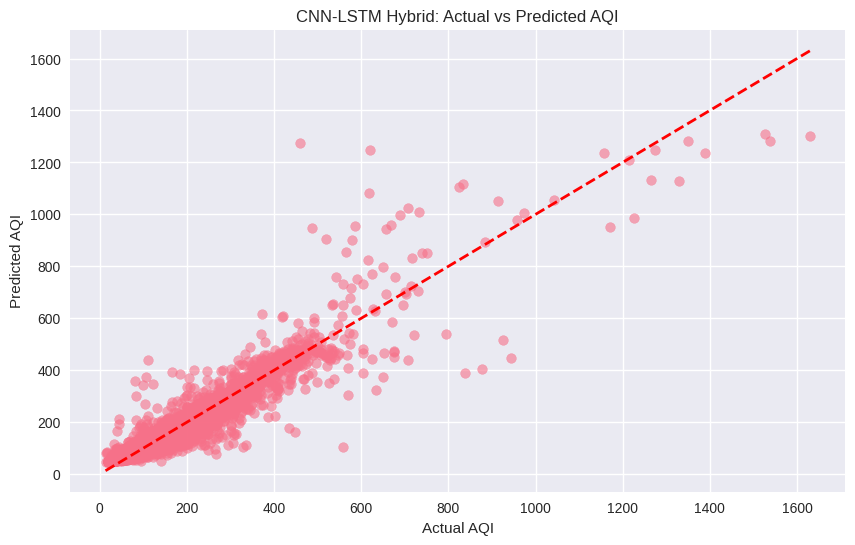

In [72]:
print("TRAINING CNN-LSTM HYBRID MODEL")

cnn_lstm_model = build_cnn_lstm_hybrid(input_shape)
cnn_lstm_model.summary()

# Train the hybrid model
cnn_lstm_history = cnn_lstm_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
cnn_lstm_metrics = evaluate_model(cnn_lstm_model, X_test_3d, y_test, "CNN-LSTM Hybrid")

In [75]:
def build_cnn_bilstm_hybrid(input_shape):
    model = Sequential([
        # CNN feature extraction without pooling
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'),
        Dropout(0.3),
        
        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        Dropout(0.4),
        
        # Bidirectional LSTM for temporal patterns
        Bidirectional(LSTM(128, activation='tanh', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64, activation='tanh')),
        Dropout(0.2),
        
        # Output
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    return model

TRAINING CNN-BILSTM HYBRID MODEL
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1, 64)             2176      
                                                                 
 dropout_12 (Dropout)        (None, 1, 64)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 128)            24704     
                                                                 
 dropout_13 (Dropout)        (None, 1, 128)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 1, 256)            263168    
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 1, 256)            0         
                     

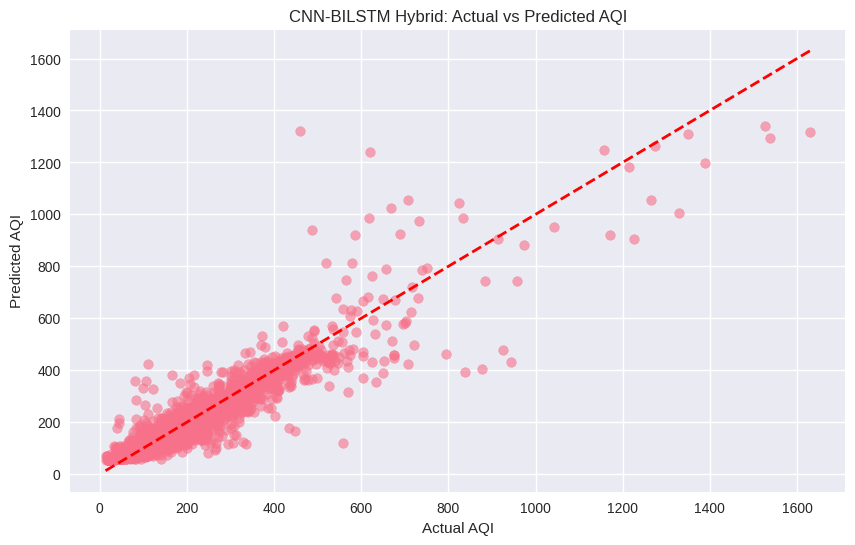

In [76]:
print("TRAINING CNN-BILSTM HYBRID MODEL")

cnn_bilstm_model = build_cnn_bilstm_hybrid(input_shape)
cnn_bilstm_model.summary()

# Train the hybrid model
cnn_bilstm_history = cnn_bilstm_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
cnn_bilstm_metrics = evaluate_model(cnn_bilstm_model, X_test_3d, y_test, "CNN-BILSTM Hybrid")

In [77]:
def build_rnn_lstm_hybrid(input_shape):
    """
    Hybrid model combining RNN and LSTM layers
    RNN captures short-term patterns, LSTM handles long-term dependencies
    """
    model = Sequential([
        # RNN layers for initial pattern recognition
        SimpleRNN(64, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        SimpleRNN(32, activation='relu', return_sequences=True),
        Dropout(0.3),
        
        # LSTM layers for long-term temporal dependencies
        LSTM(128, activation='tanh', return_sequences=True),
        Dropout(0.4),
        LSTM(64, activation='tanh'),
        Dropout(0.2),
        
        # Output layers
        Dense(32, activation='relu'),
        Dense(1)  # Regression output for AQI
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

TRAINING RNN-LSTM HYBRID MODEL
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4864      
                                                                 
 dropout_16 (Dropout)        (None, 1, 64)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 32)             3104      
                                                                 
 dropout_17 (Dropout)        (None, 1, 32)             0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 128)            82432     
                                                                 
 dropout_18 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_9 (LSTM)         

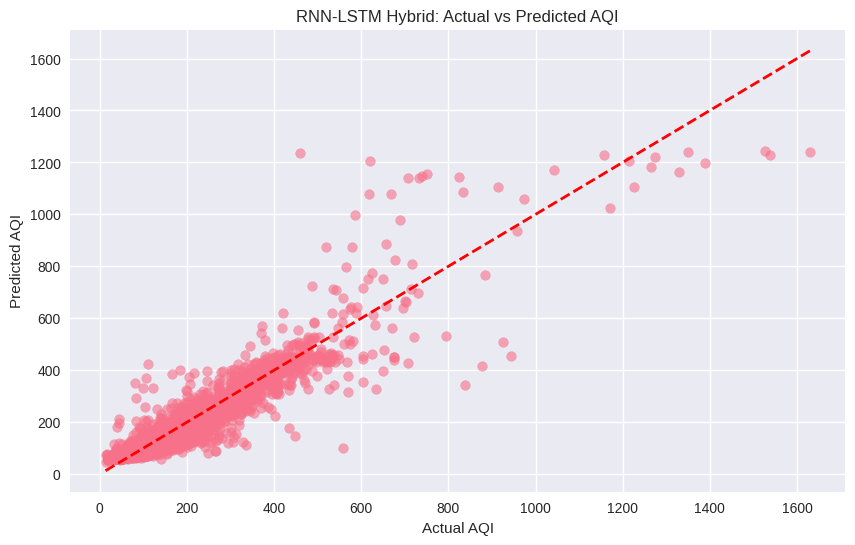

In [78]:
print("TRAINING RNN-LSTM HYBRID MODEL")

rnn_lstm_model = build_rnn_lstm_hybrid(input_shape)
rnn_lstm_model.summary()

# Train the hybrid model
rnn_lstm_history = rnn_lstm_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
rnn_lstm_metrics = evaluate_model(rnn_lstm_model, X_test_3d, y_test, "RNN-LSTM Hybrid")

In [79]:
def build_rnn_cnn_hybrid(input_shape):
    """
    Hybrid model combining RNN and CNN layers
    RNN for temporal patterns, CNN for feature extraction
    """
    model = Sequential([
        # RNN layers for temporal pattern recognition
        SimpleRNN(64, activation='relu', return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        SimpleRNN(32, activation='relu', return_sequences=True),
        Dropout(0.3),
        
        # CNN layers for feature extraction from RNN outputs
        Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        Dropout(0.3),
        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        Dropout(0.4),
        
        # Global pooling to handle variable sequence lengths
        GlobalAveragePooling1D(),
        
        # Output layers
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

TRAINING RNN-CNN HYBRID MODEL
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4864      
                                                                 
 dropout_20 (Dropout)        (None, 1, 64)             0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 32)             3104      
                                                                 
 dropout_21 (Dropout)        (None, 1, 32)             0         
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 64)             6208      
                                                                 
 dropout_22 (Dropout)        (None, 1, 64)             0         
                                                                 
 conv1d_9 (Conv1D)      

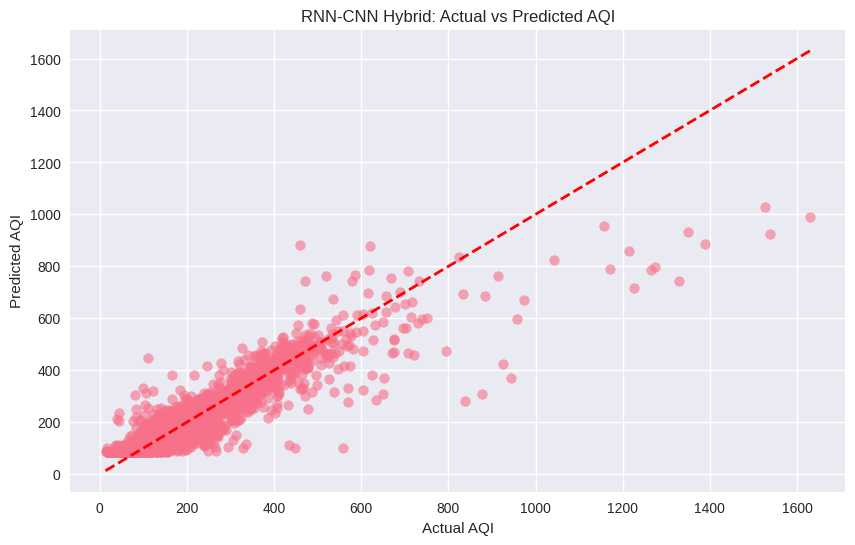

In [80]:
print("TRAINING RNN-CNN HYBRID MODEL")

rnn_cnn_model = build_rnn_cnn_hybrid(input_shape)
rnn_cnn_model.summary()

# Train the hybrid model
rnn_cnn_history = rnn_cnn_model.fit(
    X_train_3d, y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
rnn_cnn_metrics = evaluate_model(rnn_cnn_model, X_test_3d, y_test, "RNN-CNN Hybrid")

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

def compare_hybrid_models(models_dict, X_train, y_train, X_test, y_test, 
                         batch_size=32, n_epochs=100, validation_split=0.2,
                         callbacks=None, verbose=1):
    """
    Compare multiple hybrid models and return comprehensive metrics and visualizations
    
    Parameters:
    models_dict: dict of {'model_name': model_function}
    X_train, y_train: training data
    X_test, y_test: test data
    batch_size, n_epochs: training parameters
    callbacks: list of callbacks
    verbose: verbosity level
    """
    
    results = {
        'model_names': [],
        'train_times': [],
        'mae_scores': [],
        'mse_scores': [],
        'rmse_scores': [],
        'r2_scores': [],
        'models': [],
        'histories': [],
        'predictions': []
    }
    
    if callbacks is None:
        callbacks = []
    
    print("="*80)
    print("COMPARING HYBRID MODELS")
    print("="*80)
    
    for model_name, model_func in models_dict.items():
        print(f"\n{'='*60}")
        print(f"TRAINING: {model_name}")
        print(f"{'='*60}")
        
        try:
            # Build model
            model = model_func(X_train.shape[1:])
            
            # Train model with timing
            start_time = time.time()
            
            history = model.fit(
                X_train, y_train,
                batch_size=batch_size,
                epochs=n_epochs,
                validation_split=validation_split,
                callbacks=callbacks,
                verbose=verbose
            )
            
            train_time = time.time() - start_time
            
            # Make predictions
            y_pred = model.predict(X_test, verbose=0).flatten()
            
            # Calculate metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            
            # Store results
            results['model_names'].append(model_name)
            results['train_times'].append(train_time)
            results['mae_scores'].append(mae)
            results['mse_scores'].append(mse)
            results['rmse_scores'].append(rmse)
            results['r2_scores'].append(r2)
            results['models'].append(model)
            results['histories'].append(history)
            results['predictions'].append(y_pred)
            
            print(f"✓ Training completed in {train_time:.2f} seconds")
            print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
            
        except Exception as e:
            print(f"✗ Error training {model_name}: {str(e)}")
            continue
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Model': results['model_names'],
        'Training_Time(s)': results['train_times'],
        'MAE': results['mae_scores'],
        'MSE': results['mse_scores'],
        'RMSE': results['rmse_scores'],
        'R2_Score': results['r2_scores']
    }).sort_values('RMSE')
    
    # Generate visualizations
    generate_comparison_plots(comparison_df, results)
    
    return comparison_df, results

def generate_comparison_plots(comparison_df, results):
    """Generate comparison plots for model metrics"""
    
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Hybrid Models Comparison for AQI Prediction', fontsize=16, fontweight='bold')
    
    # 1. RMSE Comparison
    axes[0, 0].barh(comparison_df['Model'], comparison_df['RMSE'], color='skyblue')
    axes[0, 0].set_title('RMSE Comparison (Lower is Better)')
    axes[0, 0].set_xlabel('RMSE')
    axes[0, 0].invert_yaxis()
    
    # 2. R² Score Comparison
    axes[0, 1].barh(comparison_df['Model'], comparison_df['R2_Score'], color='lightgreen')
    axes[0, 1].set_title('R² Score Comparison (Higher is Better)')
    axes[0, 1].set_xlabel('R² Score')
    axes[0, 1].set_xlim(0, 1)
    axes[0, 1].invert_yaxis()
    
    # 3. Training Time Comparison
    axes[0, 2].barh(comparison_df['Model'], comparison_df['Training_Time(s)'], color='salmon')
    axes[0, 2].set_title('Training Time Comparison (Seconds)')
    axes[0, 2].set_xlabel('Training Time (s)')
    axes[0, 2].invert_yaxis()
    
    # 4. MAE Comparison
    axes[1, 0].barh(comparison_df['Model'], comparison_df['MAE'], color='gold')
    axes[1, 0].set_title('MAE Comparison (Lower is Better)')
    axes[1, 0].set_xlabel('MAE')
    axes[1, 0].invert_yaxis()
    
    # 5. Actual vs Predicted for best model
    best_model_idx = comparison_df['RMSE'].idxmin()
    best_model_name = comparison_df.loc[best_model_idx, 'Model']
    best_predictions = results['predictions'][best_model_idx]
    
    axes[1, 1].scatter(y_test, best_predictions, alpha=0.6, color='purple')
    max_val = max(max(y_test), max(best_predictions))
    axes[1, 1].plot([0, max_val], [0, max_val], 'r--', lw=2)
    axes[1, 1].set_xlabel('Actual AQI')
    axes[1, 1].set_ylabel('Predicted AQI')
    axes[1, 1].set_title(f'Actual vs Predicted - {best_model_name}')
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Training Loss Comparison
    for i, model_name in enumerate(results['model_names']):
        history = results['histories'][i]
        axes[1, 2].plot(history.history['loss'], label=model_name, alpha=0.8)
    
    axes[1, 2].set_title('Training Loss Comparison')
    axes[1, 2].set_xlabel('Epochs')
    axes[1, 2].set_ylabel('Loss')
    axes[1, 2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed comparison table
    print("\n" + "="*80)
    print("DETAILED MODEL COMPARISON")
    print("="*80)
    print(comparison_df.round(4).to_string(index=False))
    
    # Print best model
    best_row = comparison_df.iloc[0]
    print(f"\n🏆 BEST MODEL: {best_row['Model']}")
    print(f"   RMSE: {best_row['RMSE']:.4f}, R²: {best_row['R2_Score']:.4f}")
    print(f"   Training Time: {best_row['Training_Time(s)']:.2f}s")

def evaluate_single_model(model, X_test, y_test, model_name):
    """Evaluate a single model and return metrics"""
    y_pred = model.predict(X_test, verbose=0).flatten()
    
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    
    print(f"\n{'='*50}")
    print(f"EVALUATION: {model_name}")
    print(f"{'='*50}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return metrics, y_pred

# Example usage function
def example_usage():
    """Example of how to use the comparison function"""
    
    # Define your models dictionary
    models_to_compare = {
        'CNN-LSTM': build_cnn_lstm_hybrid,
        'CNN-BiLSTM': build_cnn_bilstm_hybrid,
        'RNN-LSTM': build_rnn_lstm_hybrid,
        'RNN-CNN': build_rnn_cnn_hybrid,
    }
    
    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
    )
    
    callbacks = [early_stopping, reduce_lr]
    
    # Run comparison
    comparison_df, results = compare_hybrid_models(
        models_dict=models_to_compare,
        X_train=X_train_3d,
        y_train=y_train,
        X_test=X_test_3d,
        y_test=y_test,
        batch_size=32,
        n_epochs=100,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )
    
    return comparison_df, results

# Additional utility function for model persistence
def save_comparison_results(comparison_df, results, filename='hybrid_models_comparison.csv'):
    """Save comparison results to CSV"""
    comparison_df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")
    
    # Also save detailed predictions
    predictions_df = pd.DataFrame({
        'Actual': y_test
    })
    
    for i, model_name in enumerate(results['model_names']):
        predictions_df[model_name] = results['predictions'][i]
    
    predictions_df.to_csv('model_predictions.csv', index=False)
    print("Predictions saved to model_predictions.csv")

COMPARING HYBRID MODELS

TRAINING: CNN-LSTM
Epoch 1/100
497/497 [==============================] - 9s 12ms/step - loss: 27574.8359 - mae: 107.1824 - val_loss: 17292.1387 - val_mae: 76.2393 - lr: 0.0010
Epoch 2/100
497/497 [==============================] - 4s 8ms/step - loss: 9659.4453 - mae: 44.1387 - val_loss: 5368.3882 - val_mae: 29.7278 - lr: 0.0010
Epoch 3/100
497/497 [==============================] - 4s 8ms/step - loss: 5669.9258 - mae: 33.4807 - val_loss: 4101.9556 - val_mae: 28.5818 - lr: 0.0010
Epoch 4/100
497/497 [==============================] - 4s 8ms/step - loss: 4578.7651 - mae: 32.3510 - val_loss: 3438.5854 - val_mae: 27.7536 - lr: 0.0010
Epoch 5/100
497/497 [==============================] - 4s 9ms/step - loss: 4018.3289 - mae: 31.4317 - val_loss: 3023.3577 - val_mae: 25.9090 - lr: 0.0010
Epoch 6/100
497/497 [==============================] - 5s 10ms/step - loss: 3664.5793 - mae: 30.6539 - val_loss: 2944.2905 - val_mae: 28.2515 - lr: 0.0010
Epoch 7/100
497/497 [======

2025-09-15 10:30:03.108076: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_8/simple_rnn_4/while/body/_1/sequential_8/simple_rnn_4/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 10:30:03.110031: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_8/simple_rnn_5/while/body/_74/sequential_8/simple_rnn_5/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 10:30:03.170035: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential_8/simple_rnn_5/while/body/_74/sequential_8/simple_rnn_5/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 10

497/497 [==============================] - 9s 11ms/step - loss: 25847.1465 - mae: 99.6708 - mse: 25847.1465 - val_loss: 10812.0479 - val_mae: 49.6004 - val_mse: 10812.0479 - lr: 0.0010
Epoch 2/100
497/497 [==============================] - 4s 8ms/step - loss: 7813.2793 - mae: 39.5788 - mse: 7813.2793 - val_loss: 4932.8989 - val_mae: 29.8954 - val_mse: 4932.8989 - lr: 0.0010
Epoch 3/100
497/497 [==============================] - 4s 9ms/step - loss: 5367.6450 - mae: 34.1148 - mse: 5367.6450 - val_loss: 3733.9080 - val_mae: 27.6870 - val_mse: 3733.9080 - lr: 0.0010
Epoch 4/100
497/497 [==============================] - 5s 10ms/step - loss: 4552.2026 - mae: 33.1694 - mse: 4552.2026 - val_loss: 3257.9878 - val_mae: 27.0851 - val_mse: 3257.9878 - lr: 0.0010
Epoch 5/100
497/497 [==============================] - 5s 9ms/step - loss: 4193.3945 - mae: 32.7012 - mse: 4193.3945 - val_loss: 3044.0461 - val_mae: 27.8520 - val_mse: 3044.0461 - lr: 0.0010
Epoch 6/100
497/497 [=========================

2025-09-15 10:33:55.834162: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_9/simple_rnn_6/while/body/_1/sequential_9/simple_rnn_6/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 10:33:55.836186: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential_9/simple_rnn_7/while/body/_74/sequential_9/simple_rnn_7/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 10:33:55.890290: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential_9/simple_rnn_7/while/body/_74/sequential_9/simple_rnn_7/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 10

497/497 [==============================] - 6s 8ms/step - loss: 10336.0273 - mae: 61.0525 - mse: 10336.0273 - val_loss: 4884.8564 - val_mae: 38.7943 - val_mse: 4884.8564 - lr: 0.0010
Epoch 2/100
497/497 [==============================] - 4s 8ms/step - loss: 5735.8467 - mae: 43.7322 - mse: 5735.8467 - val_loss: 3708.4395 - val_mae: 35.2880 - val_mse: 3708.4395 - lr: 0.0010
Epoch 3/100
497/497 [==============================] - 4s 7ms/step - loss: 5572.5205 - mae: 42.8975 - mse: 5572.5205 - val_loss: 2845.3306 - val_mae: 30.0552 - val_mse: 2845.3306 - lr: 0.0010
Epoch 4/100
497/497 [==============================] - 3s 7ms/step - loss: 5003.9497 - mae: 40.4713 - mse: 5003.9497 - val_loss: 2836.2009 - val_mae: 29.7614 - val_mse: 2836.2009 - lr: 0.0010
Epoch 5/100
497/497 [==============================] - 3s 7ms/step - loss: 4995.5894 - mae: 40.8871 - mse: 4995.5894 - val_loss: 2784.6514 - val_mae: 29.3243 - val_mse: 2784.6514 - lr: 0.0010
Epoch 6/100
497/497 [=============================

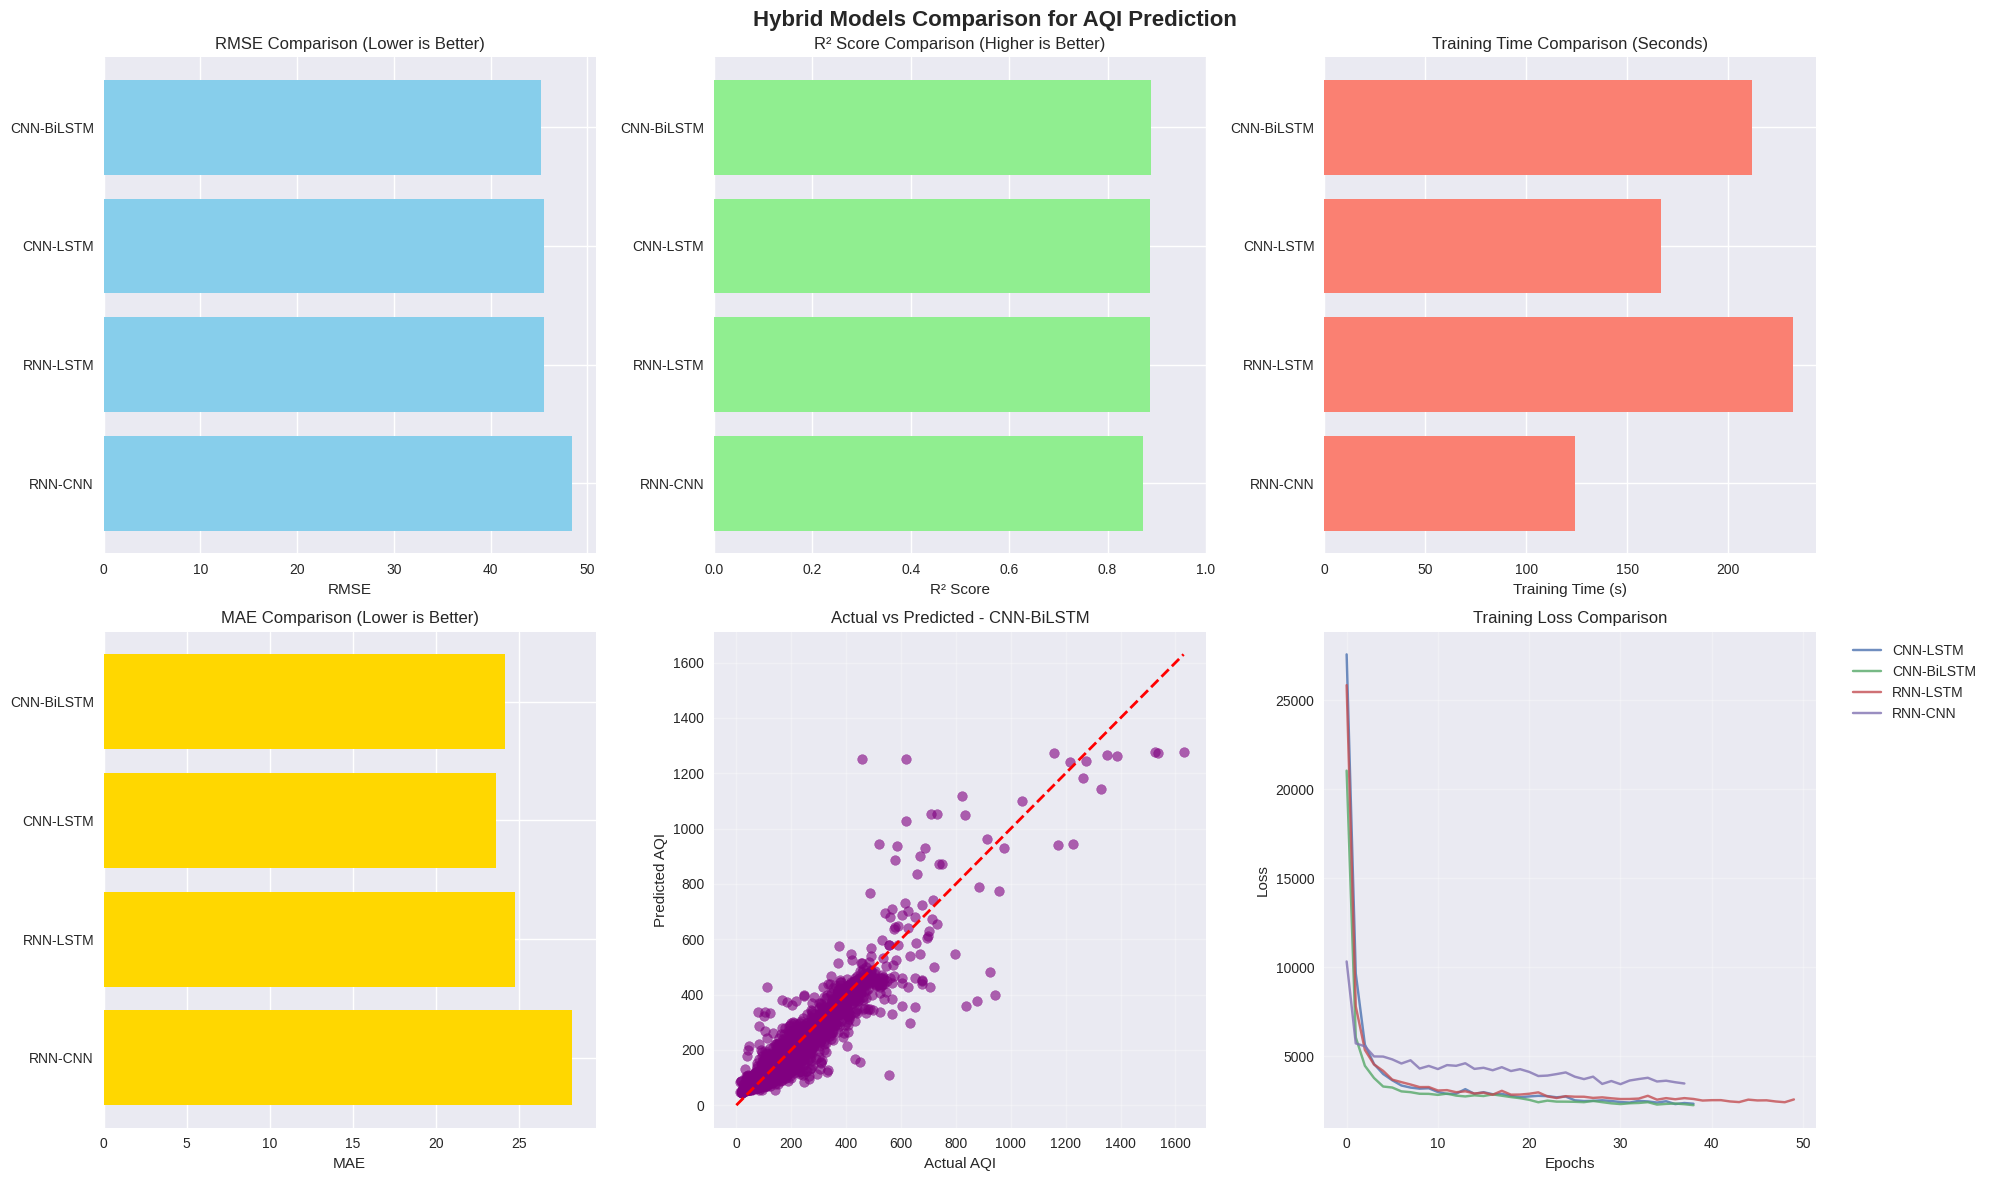


DETAILED MODEL COMPARISON
     Model  Training_Time(s)     MAE       MSE    RMSE  R2_Score
CNN-BiLSTM          211.8081 24.1684 2045.7220 45.2297    0.8883
  CNN-LSTM          166.5375 23.6163 2073.0239 45.5305    0.8868
  RNN-LSTM          231.9915 24.7817 2077.2576 45.5769    0.8866
   RNN-CNN          124.3585 28.2357 2347.4141 48.4501    0.8718

🏆 BEST MODEL: CNN-BiLSTM
   RMSE: 45.2297, R²: 0.8883
   Training Time: 211.81s


(        Model  Training_Time(s)        MAE          MSE       RMSE  R2_Score
 1  CNN-BiLSTM        211.808103  24.168366  2045.721982  45.229658  0.888279
 0    CNN-LSTM        166.537454  23.616261  2073.023917  45.530472  0.886788
 2    RNN-LSTM        231.991470  24.781722  2077.257637  45.576942  0.886557
 3     RNN-CNN        124.358532  28.235692  2347.414098  48.450120  0.871803,
 {'model_names': ['CNN-LSTM', 'CNN-BiLSTM', 'RNN-LSTM', 'RNN-CNN'],
  'train_times': [166.53745436668396,
   211.8081030845642,
   231.99146962165833,
   124.35853242874146],
  'mae_scores': [23.616261283060915,
   24.168366105599663,
   24.781722435289225,
   28.235691987005037],
  'mse_scores': [2073.023916813603,
   2045.7219822287482,
   2077.2576369019807,
   2347.4140979710096],
  'rmse_scores': [45.53047239831367,
   45.22965821481242,
   45.57694194328949,
   48.45011968995546],
  'r2_scores': [0.886788186277229,
   0.888279197310639,
   0.8865569746997299,
   0.8718032119966148],
  'models': [

In [83]:
example_usage()

In [85]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv1D, Dense, Dropout, GlobalAveragePooling1D, Flatten,
    LSTM, SimpleRNN, Bidirectional, concatenate, Input,
    MaxPooling1D, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

# Common parameter grid for all models
COMMON_PARAM_GRID = {
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size': [32, 64],
    'dropout_rate': [0.3, 0.4, 0.5],
    'dense_units': [64, 128, 256]
}

# CNN specific parameters
CNN_PARAM_GRID = {
    'num_conv_layers': [2, 3],
    'base_filters': [32, 64],
    'kernel_size': [3, 5],
    'activation': ['relu', 'elu']
}

# RNN/LSTM specific parameters
RNN_PARAM_GRID = {
    'num_rnn_layers': [2, 3],
    'rnn_units': [64, 128, 256],
    'rnn_activation': ['tanh', 'relu']
}

# Hybrid specific parameters
HYBRID_PARAM_GRID = {
    'cnn_filters': [32, 64],
    'lstm_units': [64, 128],
    'rnn_units': [32, 64]
}

In [86]:
def build_cnn_lstm_hybrid(input_shape, params):
    """Build CNN-LSTM hybrid model"""
    model = Sequential()
    
    # Get parameters
    cnn_filters = params.get('cnn_filters', 64)
    lstm_units = params.get('lstm_units', 128)
    dropout_rate = params.get('dropout_rate', 0.3)
    dense_units = params.get('dense_units', 128)
    learning_rate = params.get('learning_rate', 0.001)
    
    # CNN layers
    model.add(Conv1D(cnn_filters, kernel_size=3, activation='relu', 
                    padding='same', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    
    model.add(Conv1D(cnn_filters * 2, kernel_size=3, activation='relu', 
                    padding='same'))
    model.add(Dropout(dropout_rate))
    
    # LSTM layers
    model.add(LSTM(lstm_units, activation='tanh', return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units // 2, activation='tanh'))
    model.add(Dropout(dropout_rate))
    
    # Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

def tune_cnn_lstm_hybrid(X_train_3d, y_train, n_trials=10):
    """Tune CNN-LSTM hybrid model"""
    return tune_hybrid_model(
        X_train_3d, y_train, 
        build_cnn_lstm_hybrid, 
        'CNN-LSTM', 
        {**COMMON_PARAM_GRID, **HYBRID_PARAM_GRID},
        n_trials
    )

In [88]:
def build_cnn_bilstm_hybrid(input_shape, params):
    """Build CNN-BiLSTM hybrid model"""
    model = Sequential()
    
    # Get parameters
    cnn_filters = params.get('cnn_filters', 64)
    lstm_units = params.get('lstm_units', 128)
    dropout_rate = params.get('dropout_rate', 0.3)
    dense_units = params.get('dense_units', 128)
    learning_rate = params.get('learning_rate', 0.001)
    
    # CNN layers
    model.add(Conv1D(cnn_filters, kernel_size=3, activation='relu', 
                    padding='same', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    
    model.add(Conv1D(cnn_filters * 2, kernel_size=3, activation='relu', 
                    padding='same'))
    model.add(Dropout(dropout_rate))
    
    # Bidirectional LSTM layers
    model.add(Bidirectional(LSTM(lstm_units, activation='tanh', return_sequences=True)))
    model.add(Dropout(dropout_rate))
    
    model.add(Bidirectional(LSTM(lstm_units // 2, activation='tanh')))
    model.add(Dropout(dropout_rate))
    
    # Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

def tune_cnn_bilstm_hybrid(X_train_3d, y_train, n_trials=10):
    """Tune CNN-BiLSTM hybrid model"""
    return tune_hybrid_model(
        X_train_3d, y_train, 
        build_cnn_bilstm_hybrid, 
        'CNN-BiLSTM', 
        {**COMMON_PARAM_GRID, **HYBRID_PARAM_GRID},
        n_trials
    )

In [89]:
def build_rnn_lstm_hybrid(input_shape, params):
    """Build RNN-LSTM hybrid model"""
    model = Sequential()
    
    # Get parameters
    rnn_units = params.get('rnn_units', 64)
    lstm_units = params.get('lstm_units', 128)
    dropout_rate = params.get('dropout_rate', 0.3)
    dense_units = params.get('dense_units', 128)
    learning_rate = params.get('learning_rate', 0.001)
    
    # RNN layers
    model.add(SimpleRNN(rnn_units, activation='relu', return_sequences=True, 
                       input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    
    model.add(SimpleRNN(rnn_units // 2, activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    # LSTM layers
    model.add(LSTM(lstm_units, activation='tanh', return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units // 2, activation='tanh'))
    model.add(Dropout(dropout_rate))
    
    # Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

def tune_rnn_lstm_hybrid(X_train_3d, y_train, n_trials=10):
    """Tune RNN-LSTM hybrid model"""
    return tune_hybrid_model(
        X_train_3d, y_train, 
        build_rnn_lstm_hybrid, 
        'RNN-LSTM', 
        {**COMMON_PARAM_GRID, **HYBRID_PARAM_GRID, **RNN_PARAM_GRID},
        n_trials
    )

In [90]:
def build_rnn_cnn_hybrid(input_shape, params):
    """Build RNN-CNN hybrid model"""
    model = Sequential()
    
    # Get parameters
    rnn_units = params.get('rnn_units', 64)
    cnn_filters = params.get('cnn_filters', 64)
    dropout_rate = params.get('dropout_rate', 0.3)
    dense_units = params.get('dense_units', 128)
    learning_rate = params.get('learning_rate', 0.001)
    
    # RNN layers
    model.add(SimpleRNN(rnn_units, activation='relu', return_sequences=True, 
                       input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    
    model.add(SimpleRNN(rnn_units // 2, activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    # CNN layers
    model.add(Conv1D(cnn_filters, kernel_size=3, activation='relu', padding='same'))
    model.add(Dropout(dropout_rate))
    
    model.add(Conv1D(cnn_filters * 2, kernel_size=3, activation='relu', padding='same'))
    model.add(Dropout(dropout_rate))
    
    # Global pooling
    model.add(GlobalAveragePooling1D())
    
    # Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

def tune_rnn_cnn_hybrid(X_train_3d, y_train, n_trials=10):
    """Tune RNN-CNN hybrid model"""
    return tune_hybrid_model(
        X_train_3d, y_train, 
        build_rnn_cnn_hybrid, 
        'RNN-CNN', 
        {**COMMON_PARAM_GRID, **HYBRID_PARAM_GRID, **RNN_PARAM_GRID},
        n_trials
    )

In [91]:
def tune_hybrid_model(X_train_3d, y_train, build_function, model_type, param_grid, n_trials=10):
    """Generic function for hyperparameter tuning"""
    print("=" * 60)
    print(f"STARTING {model_type} HYPERPARAMETER TUNING")
    print("=" * 60)
    
    # Input validation
    if X_train_3d is None or y_train is None:
        print("Error: Training data is None")
        return None, None, None
    
    print(f"Input shape: {X_train_3d.shape}")
    print(f"Target shape: {y_train.shape}")
    
    # Create validation set
    try:
        X_train_final, X_val, y_train_final, y_val = train_test_split(
            X_train_3d, y_train, test_size=0.2, random_state=42
        )
    except Exception as e:
        print(f"Error in train_test_split: {e}")
        return None, None, None
    
    input_shape = X_train_3d.shape[1:]
    results = []
    best_score = float('inf')
    best_params = {}
    
    # Generate parameter combinations
    param_combinations = list(ParameterGrid(param_grid))
    
    if len(param_combinations) > n_trials:
        param_combinations = random.sample(param_combinations, n_trials)
    
    print(f"Testing {len(param_combinations)} {model_type} combinations...")
    
    for i, params in enumerate(param_combinations):
        print(f"\n{model_type} Trial {i+1}/{len(param_combinations)}")
        print(f"Parameters: {params}")
        
        try:
            # Build model
            model = build_function(input_shape, params)
            
            # Train model
            history = model.fit(
                X_train_final, y_train_final,
                batch_size=params.get('batch_size', 32),
                epochs=50,
                validation_data=(X_val, y_val),
                verbose=0,
                callbacks=[
                    EarlyStopping(patience=5, restore_best_weights=True, verbose=0),
                    ReduceLROnPlateau(factor=0.5, patience=3, verbose=0)
                ]
            )
            
            # Evaluate
            val_metrics = model.evaluate(X_val, y_val, verbose=0)
            val_loss = val_metrics[0]
            val_mae = val_metrics[1]
            
            # Store results
            result = {
                'trial_id': f"{model_type}_{datetime.now().strftime('%Y%m%d_%H%M%S_%f')}",
                'model_type': model_type,
                'timestamp': datetime.now().isoformat(),
                'val_loss': float(val_loss),
                'val_mae': float(val_mae),
                'final_train_loss': float(history.history['loss'][-1]),
                'training_epochs': len(history.history['loss'])
            }
            
            # Add all parameters to results
            for key, value in params.items():
                result[key] = value
            
            results.append(result)
            
            if val_loss < best_score:
                best_score = val_loss
                best_params = params.copy()
                print(f"✓ New best {model_type}! Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")
            else:
                print(f"Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")
            
            # Clean up
            del model
            tf.keras.backend.clear_session()
            
        except Exception as e:
            print(f"✗ {model_type} Error in trial {i+1}: {str(e)}")
            continue
    
    # Save results and return
    if results:
        results_df = pd.DataFrame(results)
        filename = f"{model_type.lower().replace('-', '_')}_tuning_results.csv"
        results_df.to_csv(filename, index=False)
        print(f"\n{model_type} tuning complete! Best loss: {best_score:.4f}")
        print(f"Best {model_type} params: {best_params}")
        print(f"Results saved to {filename}")
        return best_score, best_params, results_df
    else:
        print(f"No successful {model_type} trials completed")
        return None, None, None

In [92]:
def tune_all_hybrid_models(X_train_3d, y_train, n_trials=10):
    """Tune all hybrid models and save results"""
    
    tuning_functions = [
        ('CNN-LSTM', tune_cnn_lstm_hybrid),
        ('CNN-BiLSTM', tune_cnn_bilstm_hybrid),
        ('RNN-LSTM', tune_rnn_lstm_hybrid),
        ('RNN-CNN', tune_rnn_cnn_hybrid)
    ]
    
    all_results = {}
    
    for model_name, tune_function in tuning_functions:
        print(f"\n{'='*80}")
        print(f"TUNING {model_name}")
        print(f"{'='*80}")
        
        score, params, results_df = tune_function(X_train_3d, y_train, n_trials)
        
        if score is not None:
            all_results[model_name] = {
                'best_score': score,
                'best_params': params,
                'results_df': results_df
            }
        else:
            print(f"Failed to tune {model_name}")
    
    # Create summary of all results
    summary_data = []
    for model_name, results in all_results.items():
        summary_data.append({
            'Model': model_name,
            'Best_Val_Loss': results['best_score'],
            'Best_Params': str(results['best_params'])
        })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_csv('hybrid_models_summary.csv', index=False)
    print(f"\nSummary saved to hybrid_models_summary.csv")
    
    return all_results

In [94]:
debug_data_shapes(X_train_3d, y_train)


=== DATA SHAPE DEBUG ===
X_train_3d type: <class 'numpy.ndarray'>
X_train_3d shape: (19880, 1, 11)
y_train type: <class 'numpy.ndarray'>
y_train shape: (19880,)
Input shape for model: (1, 11)


In [95]:
all_results = tune_all_hybrid_models(X_train_3d, y_train, n_trials=10)



TUNING CNN-LSTM
STARTING CNN-LSTM HYPERPARAMETER TUNING
Input shape: (19880, 1, 11)
Target shape: (19880,)
Testing 10 CNN-LSTM combinations...

CNN-LSTM Trial 1/10
Parameters: {'batch_size': 32, 'cnn_filters': 32, 'dense_units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'lstm_units': 64, 'rnn_units': 32}
✓ New best CNN-LSTM! Val Loss: 2919.8826, Val MAE: 28.2507

CNN-LSTM Trial 2/10
Parameters: {'batch_size': 32, 'cnn_filters': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.0005, 'lstm_units': 64, 'rnn_units': 32}
Val Loss: 3136.4084, Val MAE: 29.5575

CNN-LSTM Trial 3/10
Parameters: {'batch_size': 32, 'cnn_filters': 64, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'lstm_units': 64, 'rnn_units': 64}
Val Loss: 3295.5334, Val MAE: 28.8245

CNN-LSTM Trial 4/10
Parameters: {'batch_size': 32, 'cnn_filters': 64, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'lstm_units': 128, 'rnn_units': 32}
✓ New best CNN-LSTM! Val Loss: 228

2025-09-15 19:46:12.745548: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 19:46:12.756348: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 19:46:12.855545: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 19:46:12.863908: E

✓ New best RNN-LSTM! Val Loss: 2350.1548, Val MAE: 26.0286

RNN-LSTM Trial 2/10
Parameters: {'batch_size': 64, 'cnn_filters': 64, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'lstm_units': 128, 'num_rnn_layers': 2, 'rnn_activation': 'relu', 'rnn_units': 64}
Val Loss: 3889.8372, Val MAE: 31.1435

RNN-LSTM Trial 3/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 256, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'lstm_units': 128, 'num_rnn_layers': 3, 'rnn_activation': 'relu', 'rnn_units': 128}
Val Loss: 2635.3484, Val MAE: 27.3901

RNN-LSTM Trial 4/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 256, 'dropout_rate': 0.5, 'learning_rate': 0.0005, 'lstm_units': 64, 'num_rnn_layers': 2, 'rnn_activation': 'tanh', 'rnn_units': 256}
✓ New best RNN-LSTM! Val Loss: 2245.1086, Val MAE: 25.2910

RNN-LSTM Trial 5/10
Parameters: {'batch_size': 64, 'cnn_filters': 64, 'dense_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.0005, 'lstm_unit

2025-09-15 19:55:26.056809: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 19:55:26.059294: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 19:55:26.150386: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 19:55:26.157958: E

Val Loss: 3865.9299, Val MAE: 31.9951

RNN-LSTM Trial 7/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 256, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'lstm_units': 128, 'num_rnn_layers': 2, 'rnn_activation': 'tanh', 'rnn_units': 128}
Val Loss: 2679.6978, Val MAE: 26.4601

RNN-LSTM Trial 8/10
Parameters: {'batch_size': 32, 'cnn_filters': 64, 'dense_units': 256, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'lstm_units': 128, 'num_rnn_layers': 3, 'rnn_activation': 'tanh', 'rnn_units': 64}


2025-09-15 19:58:51.111127: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 19:58:51.112534: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 19:58:51.153580: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 19:58:51.156607: E

Val Loss: 3279.1221, Val MAE: 29.4817

RNN-LSTM Trial 9/10
Parameters: {'batch_size': 32, 'cnn_filters': 32, 'dense_units': 256, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'lstm_units': 128, 'num_rnn_layers': 3, 'rnn_activation': 'relu', 'rnn_units': 256}


2025-09-15 20:00:17.206929: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:00:17.208326: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:00:17.247684: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 20:00:17.250403: E

✓ New best RNN-LSTM! Val Loss: 1993.7350, Val MAE: 23.7671

RNN-LSTM Trial 10/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'lstm_units': 128, 'num_rnn_layers': 3, 'rnn_activation': 'tanh', 'rnn_units': 128}
Val Loss: 3151.4514, Val MAE: 27.2934

RNN-LSTM tuning complete! Best loss: 1993.7350
Best RNN-LSTM params: {'batch_size': 32, 'cnn_filters': 32, 'dense_units': 256, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'lstm_units': 128, 'num_rnn_layers': 3, 'rnn_activation': 'relu', 'rnn_units': 256}
Results saved to rnn_lstm_tuning_results.csv

TUNING RNN-CNN
STARTING RNN-CNN HYPERPARAMETER TUNING
Input shape: (19880, 1, 11)
Target shape: (19880,)
Testing 10 RNN-CNN combinations...

RNN-CNN Trial 1/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 256, 'dropout_rate': 0.4, 'learning_rate': 0.0005, 'lstm_units': 64, 'num_rnn_layers': 2, 'rnn_activation': 'relu', 'rnn_units': 256}
✓ New best RNN-CNN!

2025-09-15 20:03:18.782069: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:03:18.783382: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:03:18.812505: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 20:03:18.848487: E

Val Loss: 3975.8652, Val MAE: 34.2530

RNN-CNN Trial 5/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'lstm_units': 64, 'num_rnn_layers': 3, 'rnn_activation': 'tanh', 'rnn_units': 128}
✓ New best RNN-CNN! Val Loss: 2618.2358, Val MAE: 27.7116

RNN-CNN Trial 6/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'lstm_units': 128, 'num_rnn_layers': 2, 'rnn_activation': 'tanh', 'rnn_units': 64}
Val Loss: 3875.9451, Val MAE: 33.2624

RNN-CNN Trial 7/10
Parameters: {'batch_size': 32, 'cnn_filters': 32, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0001, 'lstm_units': 128, 'num_rnn_layers': 2, 'rnn_activation': 'relu', 'rnn_units': 128}


2025-09-15 20:04:10.915787: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:04:10.917131: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:04:10.949596: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 20:04:10.990547: E

Val Loss: 4015.0061, Val MAE: 33.8959

RNN-CNN Trial 8/10
Parameters: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'lstm_units': 64, 'num_rnn_layers': 2, 'rnn_activation': 'tanh', 'rnn_units': 128}
Val Loss: 2919.2434, Val MAE: 27.6790

RNN-CNN Trial 9/10
Parameters: {'batch_size': 32, 'cnn_filters': 32, 'dense_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.0005, 'lstm_units': 64, 'num_rnn_layers': 3, 'rnn_activation': 'relu', 'rnn_units': 128}


2025-09-15 20:04:50.797660: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn/while/body/_1/sequential/simple_rnn/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:04:50.798979: W tensorflow/core/grappler/utils/graph_view.cc:849] No registered '' OpKernel for CPU devices compatible with node {{node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu}}
	.  Registered:  <no registered kernels>

2025-09-15 20:04:50.836586: E tensorflow/core/grappler/optimizers/tfg_optimizer_hook.cc:134] tfg_optimizer{any(tfg-consolidate-attrs,tfg-toposort,tfg-shape-inference{graph-version=0},tfg-prepare-attrs-export)} failed: INVALID_ARGUMENT: Node sequential/simple_rnn_1/while/body/_74/sequential/simple_rnn_1/while/simple_rnn_cell/Relu has an empty op name
	when importing GraphDef to MLIR module in GrapplerHook
2025-09-15 20:04:50.877834: E

Val Loss: 3043.9575, Val MAE: 29.8394

RNN-CNN Trial 10/10
Parameters: {'batch_size': 64, 'cnn_filters': 64, 'dense_units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'lstm_units': 64, 'num_rnn_layers': 2, 'rnn_activation': 'tanh', 'rnn_units': 64}
Val Loss: 2983.2932, Val MAE: 30.0300

RNN-CNN tuning complete! Best loss: 2618.2358
Best RNN-CNN params: {'batch_size': 64, 'cnn_filters': 32, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'lstm_units': 64, 'num_rnn_layers': 3, 'rnn_activation': 'tanh', 'rnn_units': 128}
Results saved to rnn_cnn_tuning_results.csv

Summary saved to hybrid_models_summary.csv


In [102]:
# Import required libraries
!pip install scikit-optimize

import tensorflow as tf
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from skopt import gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Integer, Categorical
import matplotlib.pyplot as plt

# Define the manual Bayesian optimization function
def manual_bayesian_optimization(X_train_3d, y_train, n_iter=15):
    """Manual Bayesian optimization for CNN-LSTM hyperparameters"""
    
    print("=" * 60)
    print("STARTING MANUAL BAYESIAN OPTIMIZATION")
    print("=" * 60)
    
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_3d, y_train, test_size=0.2, random_state=42
    )
    
    print(f"Training data shape: {X_train.shape}")
    print(f"Validation data shape: {X_val.shape}")
    
    # Define the search space for hyperparameters
    space = [
        Real(1e-4, 1e-2, name='learning_rate', prior='log-uniform'),
        Real(0.2, 0.6, name='dropout_rate'),
        Integer(32, 256, name='dense_units'),
        Integer(32, 128, name='cnn_filters'),
        Integer(64, 256, name='lstm_units'),
        Integer(16, 64, name='batch_size')
    ]
    
    # Objective function to minimize (validation loss)
    @use_named_args(space)
    def objective_function(learning_rate, dropout_rate, dense_units, 
                          cnn_filters, lstm_units, batch_size):
        """Objective function to minimize"""
        
        try:
            # Build the CNN-LSTM model
            model = tf.keras.Sequential([
                # CNN layers
                tf.keras.layers.Conv1D(cnn_filters, 3, activation='relu', 
                                      padding='same', input_shape=X_train_3d.shape[1:]),
                tf.keras.layers.Dropout(dropout_rate),
                
                tf.keras.layers.Conv1D(cnn_filters * 2, 3, activation='relu', padding='same'),
                tf.keras.layers.Dropout(dropout_rate),
                
                # LSTM layers
                tf.keras.layers.LSTM(lstm_units, activation='tanh', return_sequences=True),
                tf.keras.layers.Dropout(dropout_rate),
                
                tf.keras.layers.LSTM(lstm_units // 2, activation='tanh'),
                tf.keras.layers.Dropout(dropout_rate),
                
                # Dense layers
                tf.keras.layers.Dense(dense_units, activation='relu'),
                tf.keras.layers.Dropout(dropout_rate),
                
                # Output layer
                tf.keras.layers.Dense(1)
            ])
            
            # Compile the model
            model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss='mse',
                metrics=['mae']
            )
            
            # Train the model with early stopping
            history = model.fit(
                X_train, y_train,
                batch_size=int(batch_size),
                epochs=50,
                validation_data=(X_val, y_val),
                verbose=0,
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(
                        patience=5, 
                        restore_best_weights=True,
                        monitor='val_loss'
                    )
                ]
            )
            
            # Get the best validation loss from training
            best_val_loss = min(history.history['val_loss'])
            
            # Clean up to free memory
            del model
            tf.keras.backend.clear_session()
            
            # Print progress
            print(f"Trial completed: LR={learning_rate:.4f}, Dropout={dropout_rate:.2f}, "
                  f"Filters={cnn_filters}, LSTM_units={lstm_units}, "
                  f"Val Loss: {best_val_loss:.4f}")
            
            return best_val_loss
            
        except Exception as e:
            print(f"Error in trial: {e}")
            return float('inf')  # Return a very high loss for failed trials
    
    # Run the Bayesian optimization
    print("Starting Bayesian optimization...")
    result = gp_minimize(
        objective_function,    # Function to minimize
        space,                 # Search space
        n_calls=n_iter,        # Number of iterations
        random_state=42,       # For reproducibility
        verbose=True           # Show progress
    )
    
    # Extract the best parameters
    best_params = {
        'learning_rate': result.x[0],
        'dropout_rate': result.x[1],
        'dense_units': result.x[2],
        'cnn_filters': result.x[3],
        'lstm_units': result.x[4],
        'batch_size': result.x[5]
    }
    
    print("\n" + "=" * 60)
    print("OPTIMIZATION COMPLETED!")
    print("=" * 60)
    print(f"Best validation loss: {result.fun:.4f}")
    print(f"Best parameters: {best_params}")
    
    return best_params, result.fun

# Function to train the final model with best parameters
def train_final_model(X_train_3d, y_train, best_params):
    """Train the final model with optimized hyperparameters"""
    
    print("\n" + "=" * 60)
    print("TRAINING FINAL MODEL WITH BEST PARAMETERS")
    print("=" * 60)
    
    # Build the final model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(
            best_params['cnn_filters'], 3, activation='relu', 
            padding='same', input_shape=X_train_3d.shape[1:]
        ),
        tf.keras.layers.Dropout(best_params['dropout_rate']),
        
        tf.keras.layers.Conv1D(
            best_params['cnn_filters'] * 2, 3, activation='relu', padding='same'
        ),
        tf.keras.layers.Dropout(best_params['dropout_rate']),
        
        tf.keras.layers.LSTM(
            best_params['lstm_units'], activation='tanh', return_sequences=True
        ),
        tf.keras.layers.Dropout(best_params['dropout_rate']),
        
        tf.keras.layers.LSTM(
            best_params['lstm_units'] // 2, activation='tanh'
        ),
        tf.keras.layers.Dropout(best_params['dropout_rate']),
        
        tf.keras.layers.Dense(best_params['dense_units'], activation='relu'),
        tf.keras.layers.Dropout(best_params['dropout_rate']),
        
        tf.keras.layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
        loss='mse',
        metrics=['mae']
    )
    
    # Train the final model
    history = model.fit(
        X_train_3d, y_train,
        batch_size=best_params['batch_size'],
        epochs=100,
        validation_split=0.2,
        verbose=1,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
        ]
    )
    
    print("Final model training completed!")
    return model, history

Checking data shapes...
X_train_3d shape: (19880, 1, 11)
y_train shape: (19880,)
STARTING MANUAL BAYESIAN OPTIMIZATION
Training data shape: (15904, 1, 11)
Validation data shape: (3976, 1, 11)
Starting Bayesian optimization...
Iteration No: 1 started. Evaluating function at random point.
Trial completed: LR=0.0039, Dropout=0.27, Filters=89, LSTM_units=150, Val Loss: 2706.9272
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 72.1819
Function value obtained: 2706.9272
Current minimum: 2706.9272
Iteration No: 2 started. Evaluating function at random point.
Trial completed: LR=0.0008, Dropout=0.33, Filters=94, LSTM_units=75, Val Loss: 2186.1758
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 44.3043
Function value obtained: 2186.1758
Current minimum: 2186.1758
Iteration No: 3 started. Evaluating function at random point.
Trial completed: LR=0.0075, Dropout=0.20, Filters=91, LSTM_units=181, Val Loss: 21208.6602
Iteration No: 3 ended. Evaluation done at 

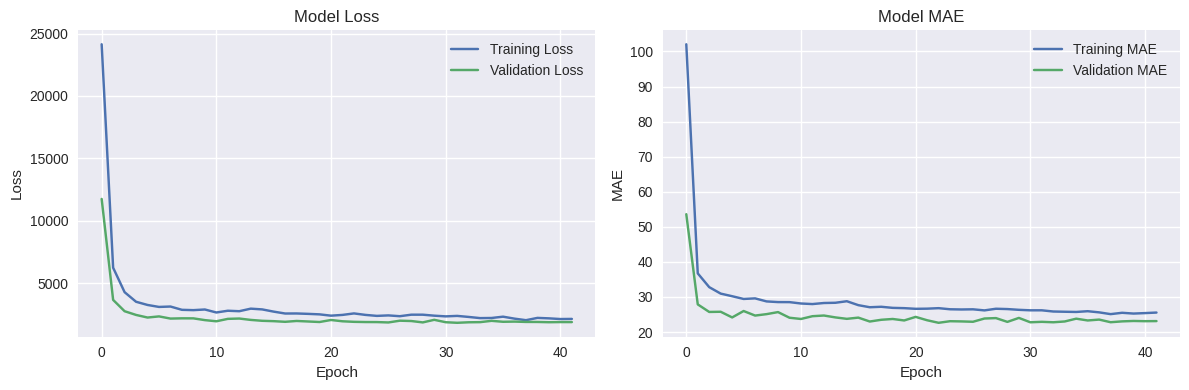

Test Loss: 1991.1233, Test MAE: 23.4121


In [103]:

# First, let's check the data shapes
print("Checking data shapes...")
print(f"X_train_3d shape: {X_train_3d.shape}")
print(f"y_train shape: {y_train.shape}")

# Run the Bayesian optimization (start with 10 iterations for testing)
best_params, best_score = manual_bayesian_optimization(X_train_3d, y_train, n_iter=10)

# Train the final model with the best parameters
if best_params is not None:
    final_model, training_history = train_final_model(X_train_3d, y_train, best_params)
    
    # Save the best model
    final_model.save('optimized_cnn_lstm_model.h5')
    print("Optimized model saved as 'optimized_cnn_lstm_model.h5'")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(training_history.history['loss'], label='Training Loss')
    plt.plot(training_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(training_history.history['mae'], label='Training MAE')
    plt.plot(training_history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate on test data if available
    if 'X_test_3d' in locals() and 'y_test' in locals():
        test_loss, test_mae = final_model.evaluate(X_test_3d, y_test, verbose=0)
        print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

In [104]:
def save_optimization_results(best_params, best_score, filename='optimization_results.csv'):
    """Save optimization results to CSV"""
    
    # Create a results dictionary
    results = {
        'optimization_date': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')],
        'best_score': [best_score],
        'learning_rate': [best_params['learning_rate']],
        'dropout_rate': [best_params['dropout_rate']],
        'dense_units': [best_params['dense_units']],
        'cnn_filters': [best_params['cnn_filters']],
        'lstm_units': [best_params['lstm_units']],
        'batch_size': [best_params['batch_size']]
    }
    
    # Save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# Save your results
if best_params is not None:
    save_optimization_results(best_params, best_score, 'cnn_lstm_optimization_results.csv')

Results saved to cnn_lstm_optimization_results.csv
